What if instead of trying faces etc etc we just 

found the center of the screen 

found the nearst number (contur)

found the nearst number to that number (conuturs again)

checked if they lined up if they did its a two diget number <br/>
---- lined up here means somthing need to be done by taking both conturs rotating each of them so that they have the thinist bounding box (that one of the dimensions is minimesed) if they both are rotated roughly the same amount to do this then they line up if it dosent work then it dosent

if they dont its a one digit number nad the one closest to the screen is the number

lazy but if it works thats a techincal working program

# step 0 take in the image
not going to be nessary in when this is moved over to main program

In [559]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui
import copy
from math import sqrt
from math import acos

debug = 1 #set to 1 to see each step set to 0 to run fast

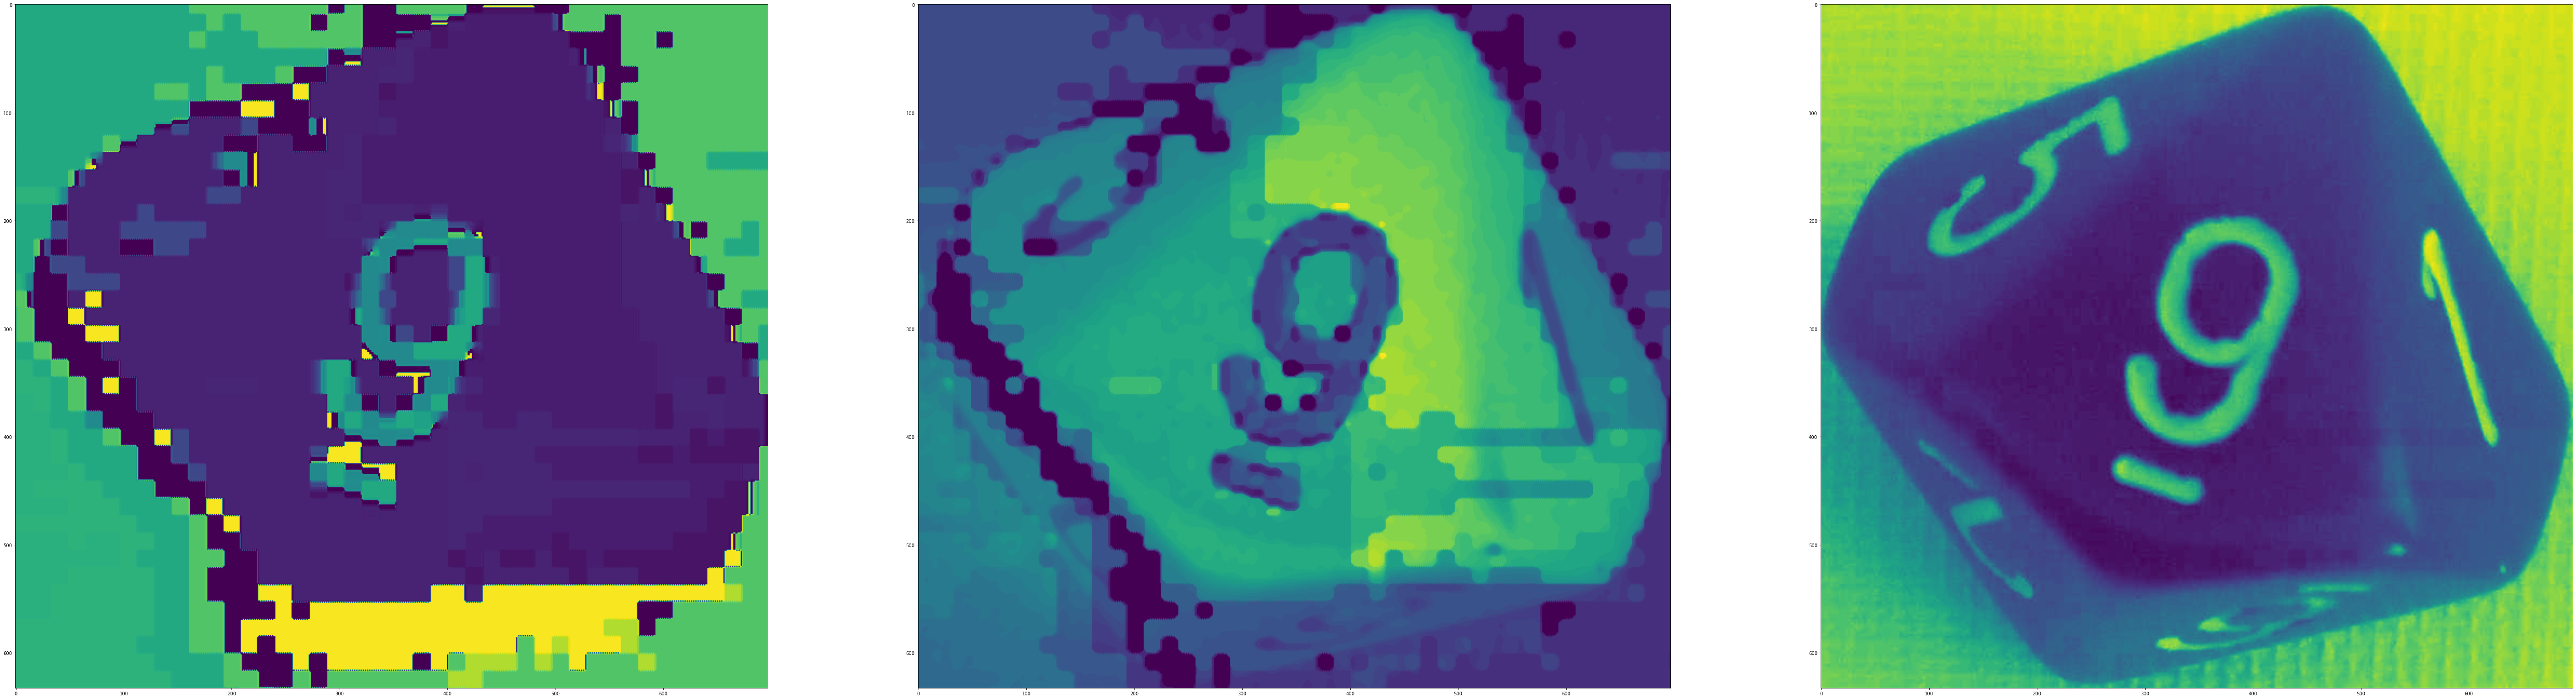

In [580]:
fileName = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])

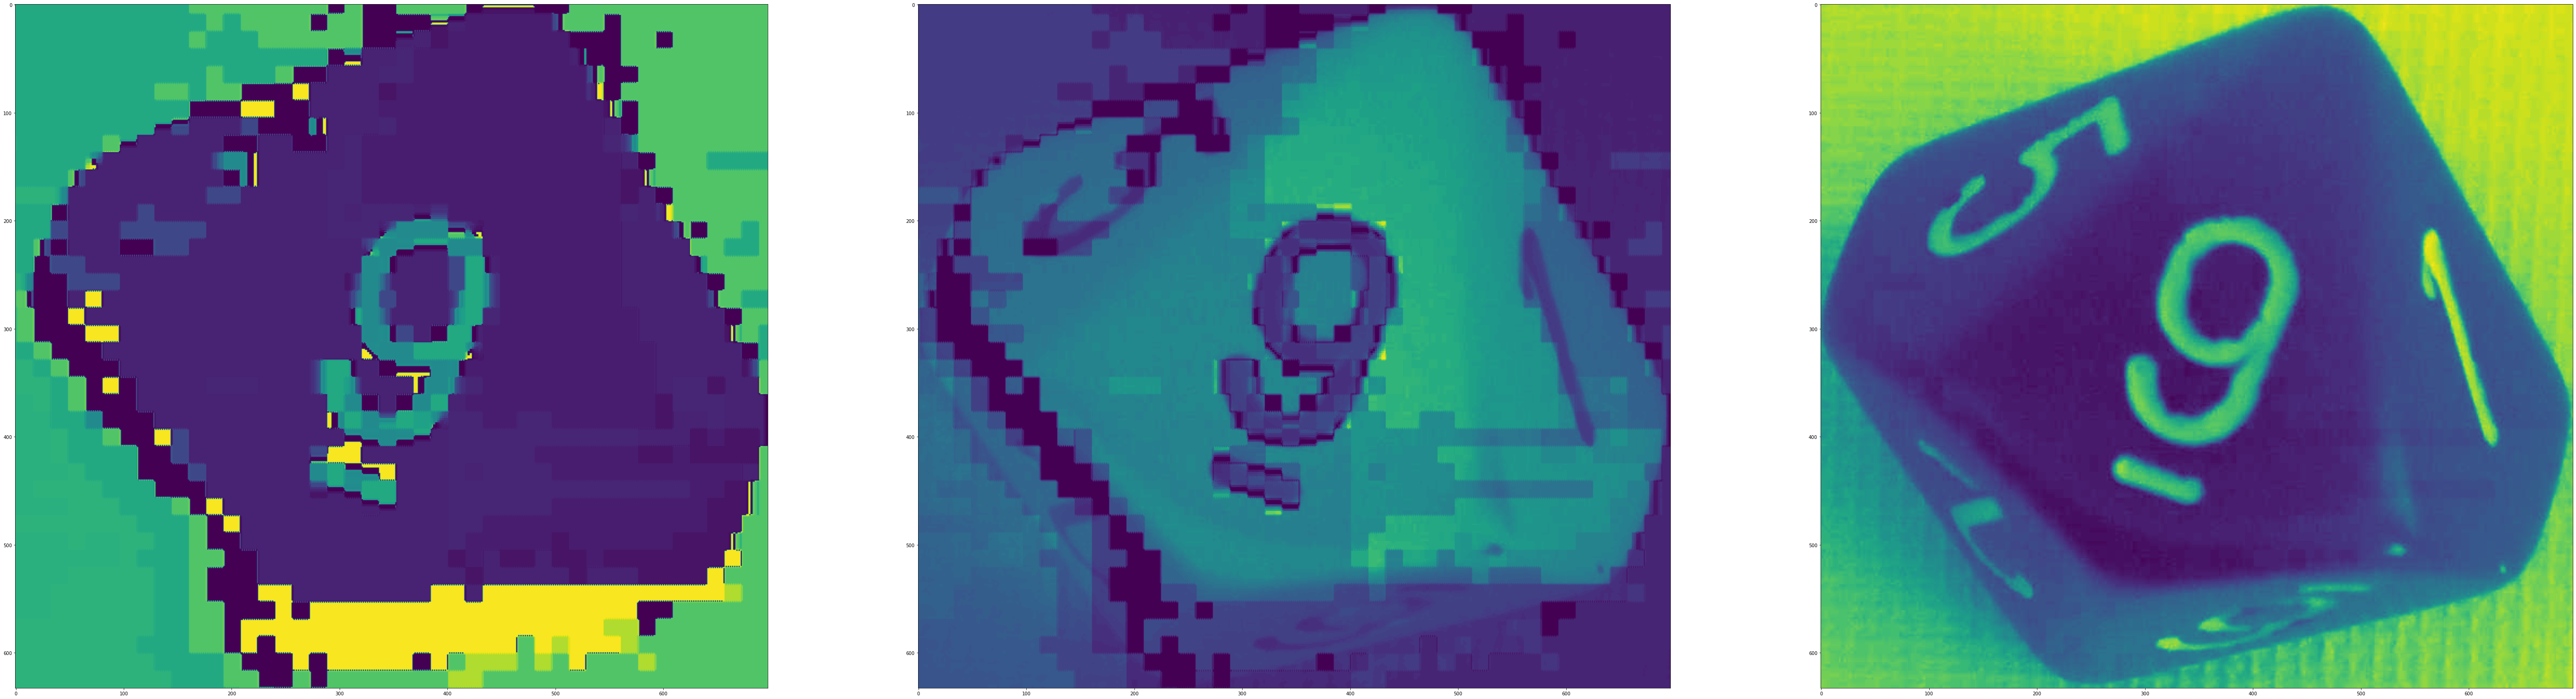

In [585]:
dieRaw = cv2.imread(fileName,cv2.IMREAD_COLOR)
dieRaw = cv2.cvtColor(dieRaw,cv2.COLOR_RGB2BGR)
dieHSV = cv2.cvtColor(dieRaw,cv2.COLOR_BGR2HSV)
dieGreyH,dieGreyS,dieGreyV = cv2.split(dieHSV)

void = 0
if debug == 1:
    plt.figure(figsize=(100,100))
    plt.subplot(1,3,1),plt.imshow(dieGreyH)
    plt.subplot(1,3,2),plt.imshow(dieGreyS)
    plt.subplot(1,3,3),plt.imshow(dieGreyV)

# step 1 find the center of the screen

In [581]:
def displayCenterOfImage(image):#purely for debuing help
    h, w = image.shape
    midY, midX = h/2, w/2
    imageCopy = copy.deepcopy(image)
    imageCopy = cv2.cvtColor(imageCopy,cv2.COLOR_GRAY2BGR)
    cv2.circle(img = imageCopy,center = (int(midY), int(midX)),radius =5, color = (0,0,255), thickness = -1)
    plt.imshow(imageCopy)
    
def distBettweenPoints(x1,y1,x2,y2):
    distance = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
    return distance

In [582]:
#h, w = dieGray.shape
#midY, midX = h/2, w/2
#displayCenterOfImage(dieGray)
#dieGrayEqual = cv2.equalizeHist(dieGray)


# step 2 find the two nearest conturs to the center

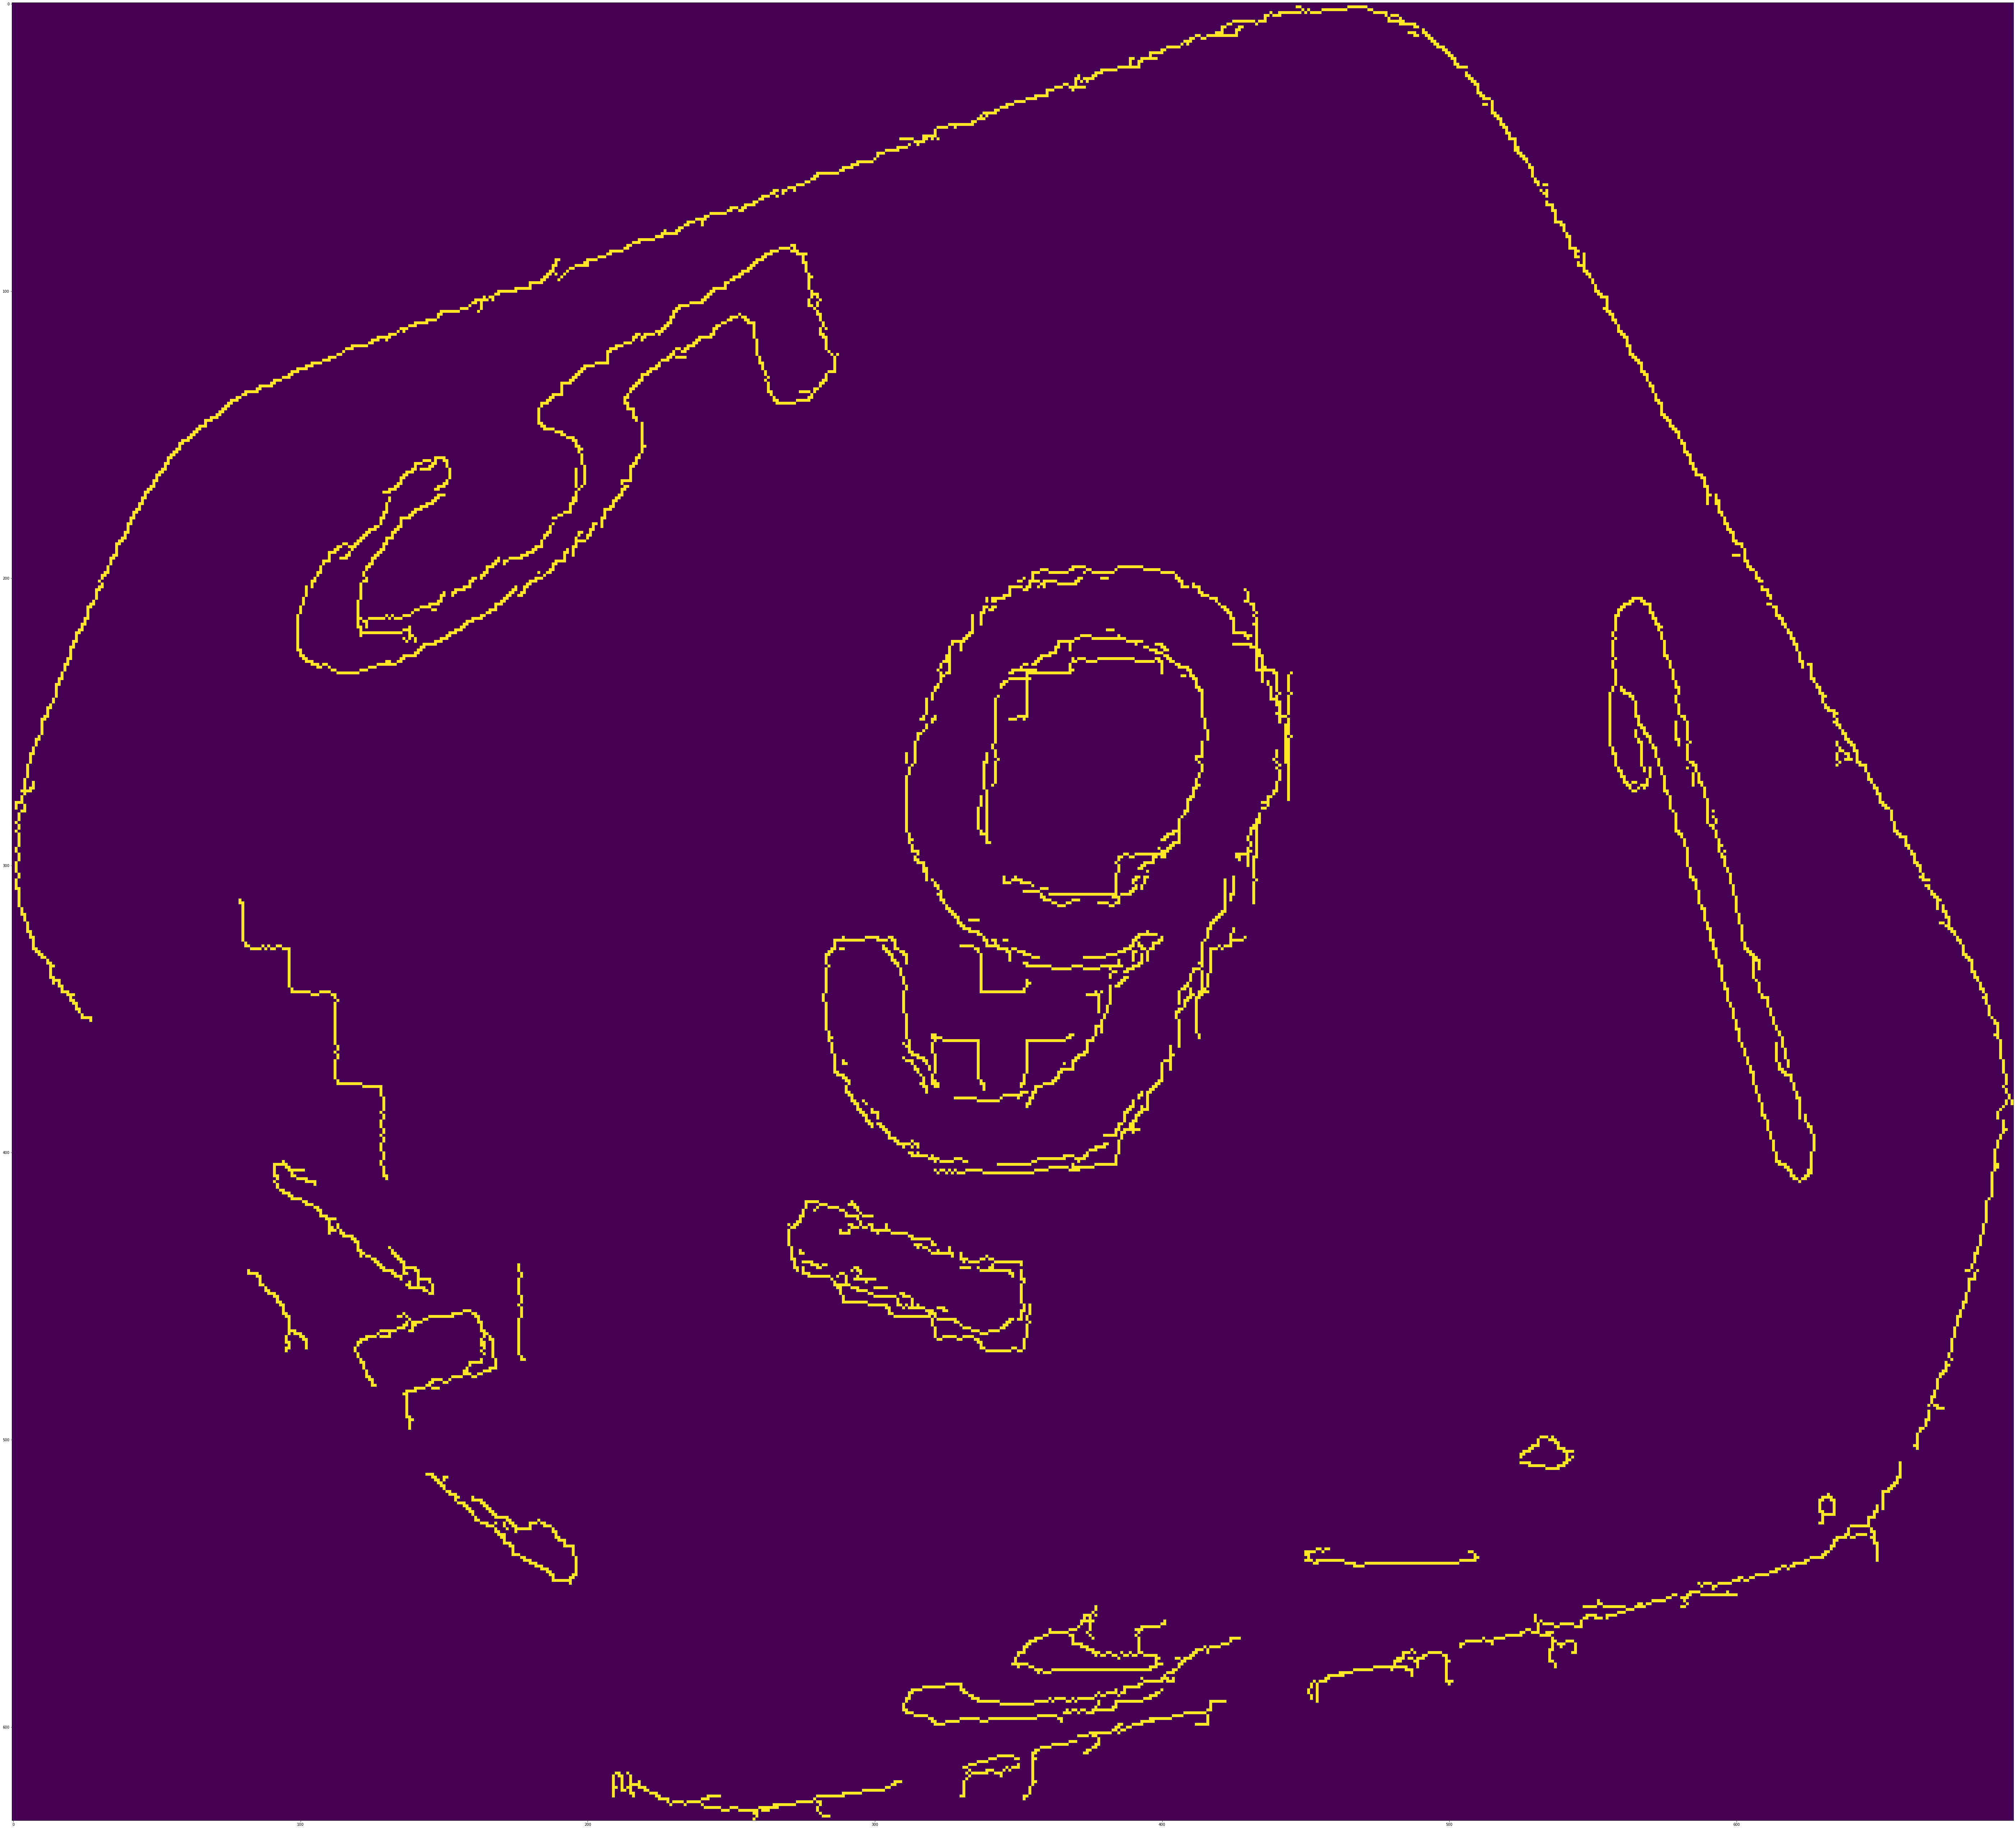

In [586]:
#MAGIC threshoulding stuff
#thresholdConsant = (np.mean(dieGray) + np.std(dieGray))/25
#threshholdedDieGray = cv2.adaptiveThreshold(dieGray, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 501,thresholdConsant)
#dieBlured = cv2.medianBlur(dieGray, 9)
cannyedS = cv2.Canny(dieGreyS,50,110)
cannyedV = cv2.Canny(dieGreyV,25,110)
cannyed = cv2.bitwise_or(cannyedV, cannyedS)
if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(cannyed)

 clean up

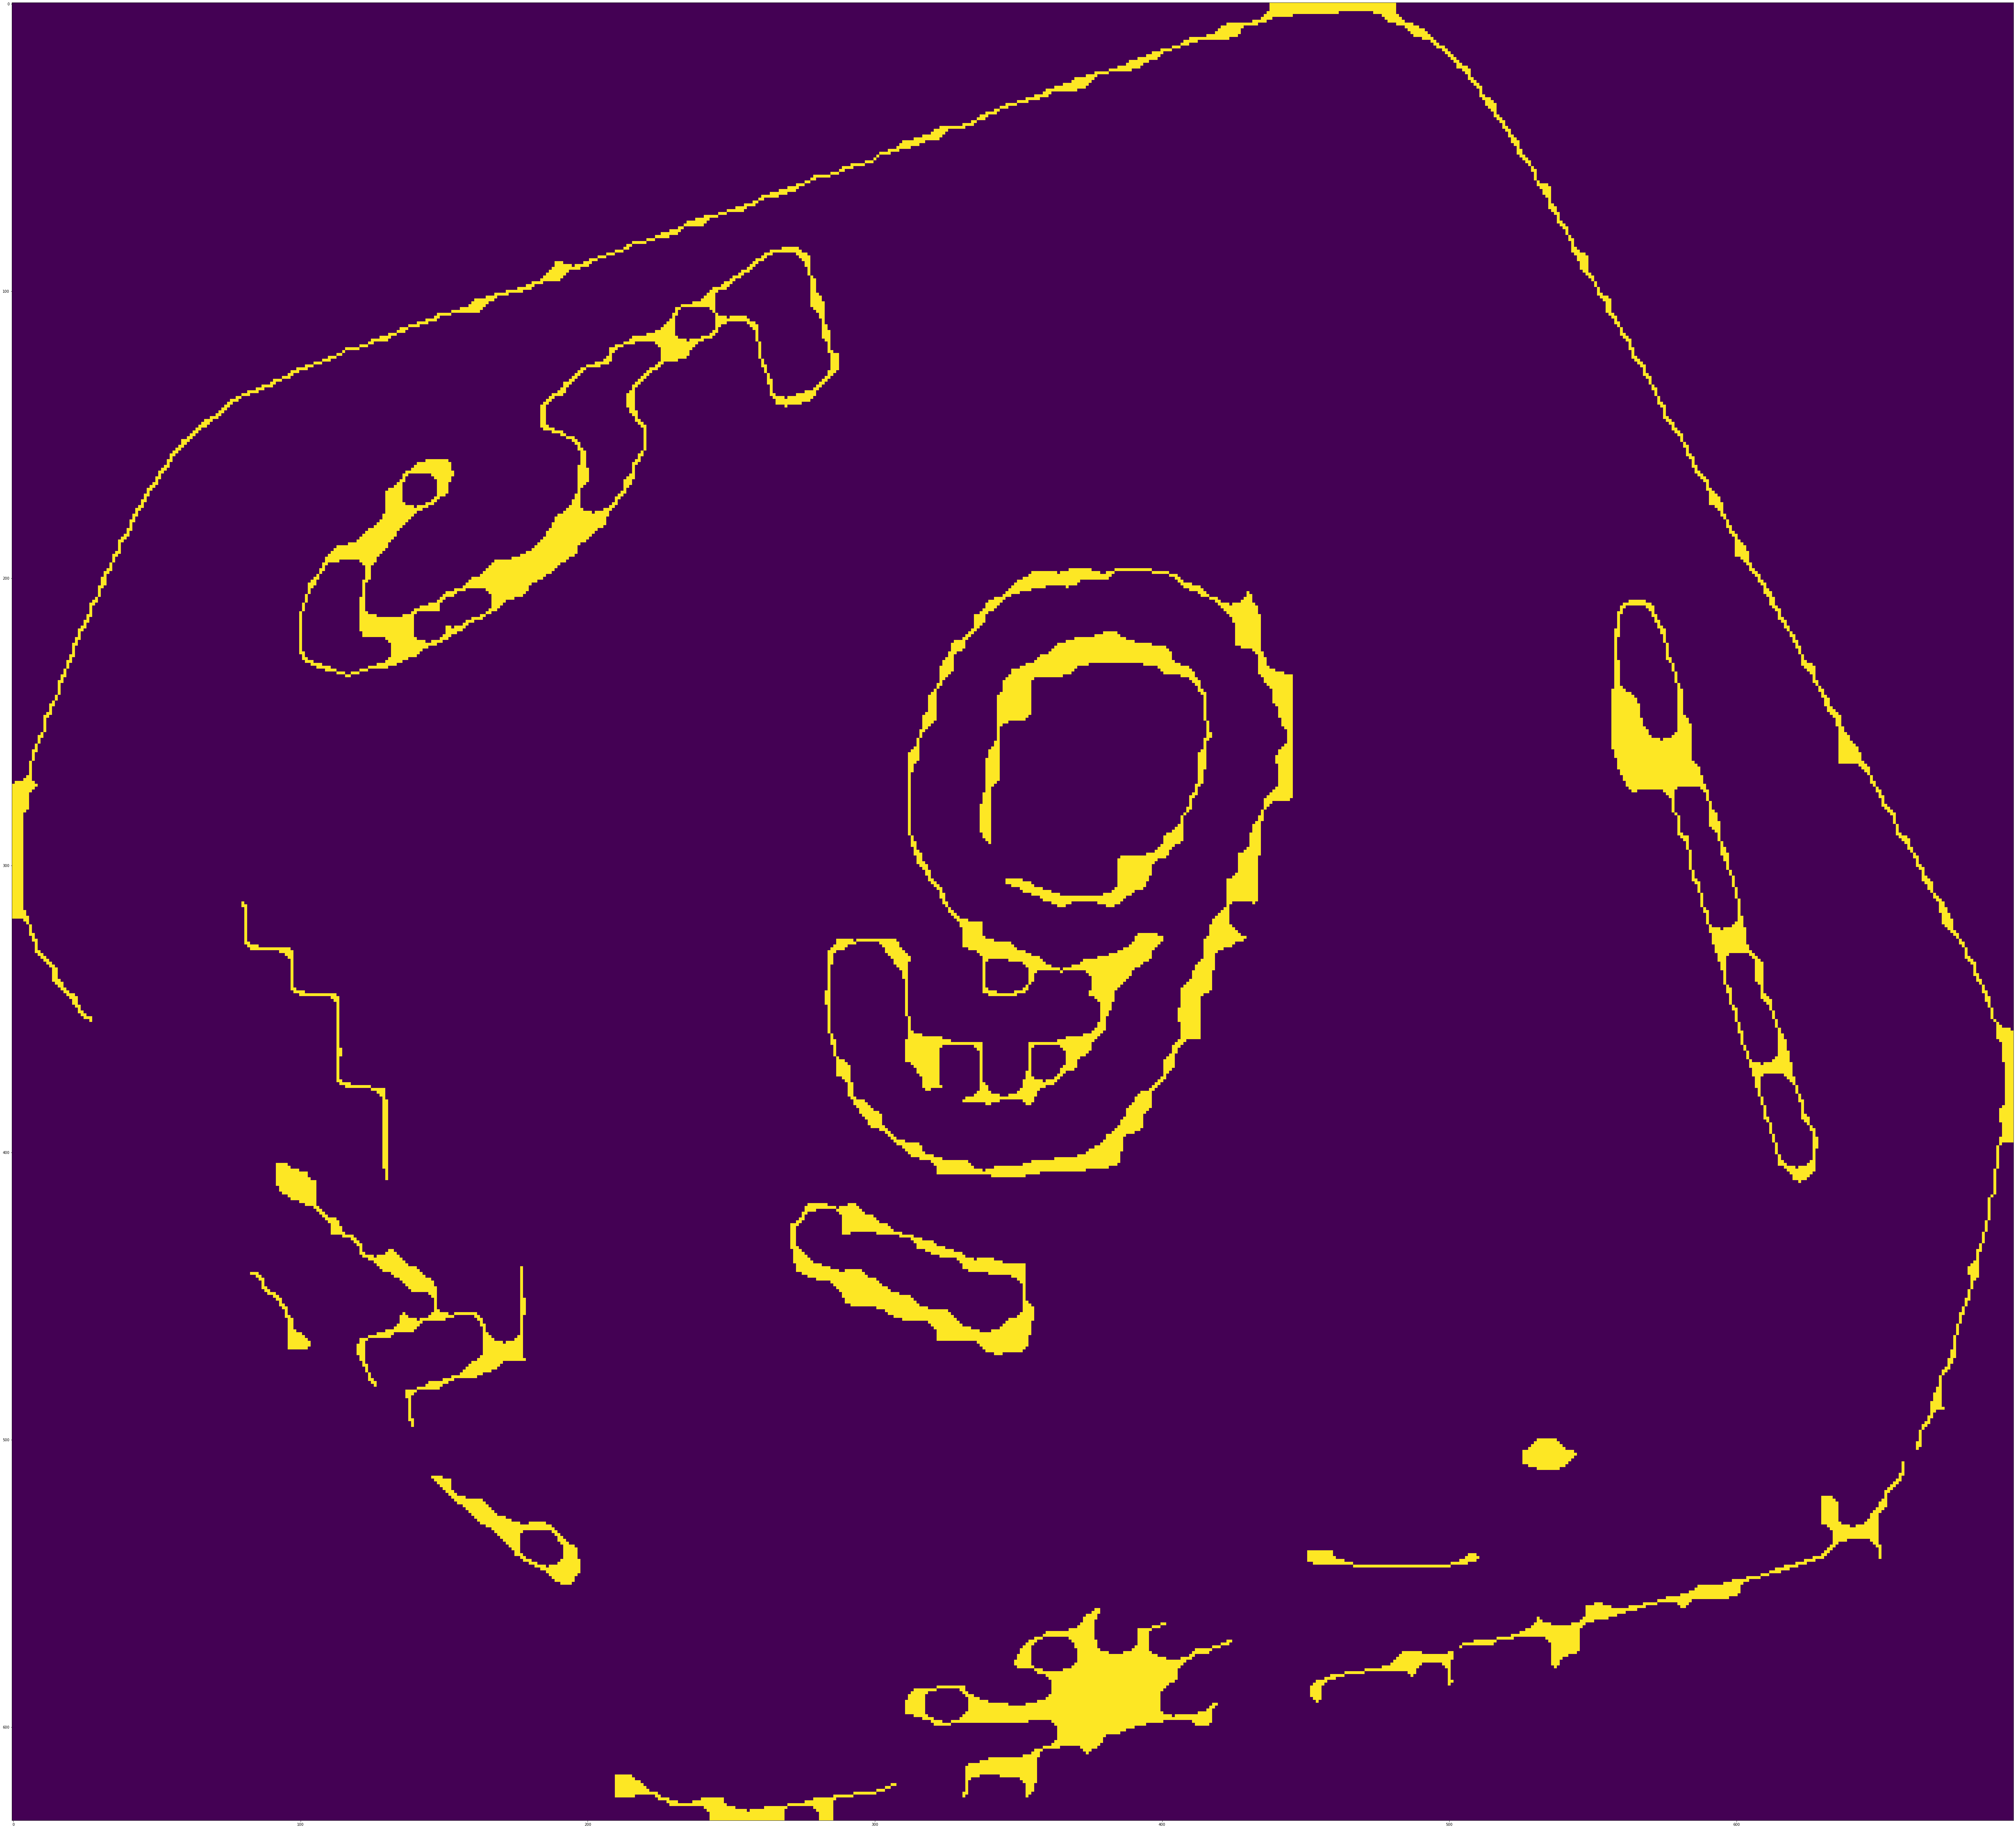

In [588]:
#MAGIC - how do we know what size the tiding up stuff should be?
def circle(diamter):
    return cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(diamter,diamter))
#making this genralised is really hard
circleSize = 10

diceMask = cv2.dilate(cannyed,circle(circleSize))
diceMask = cv2.erode(diceMask,circle(circleSize))

if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(diceMask)

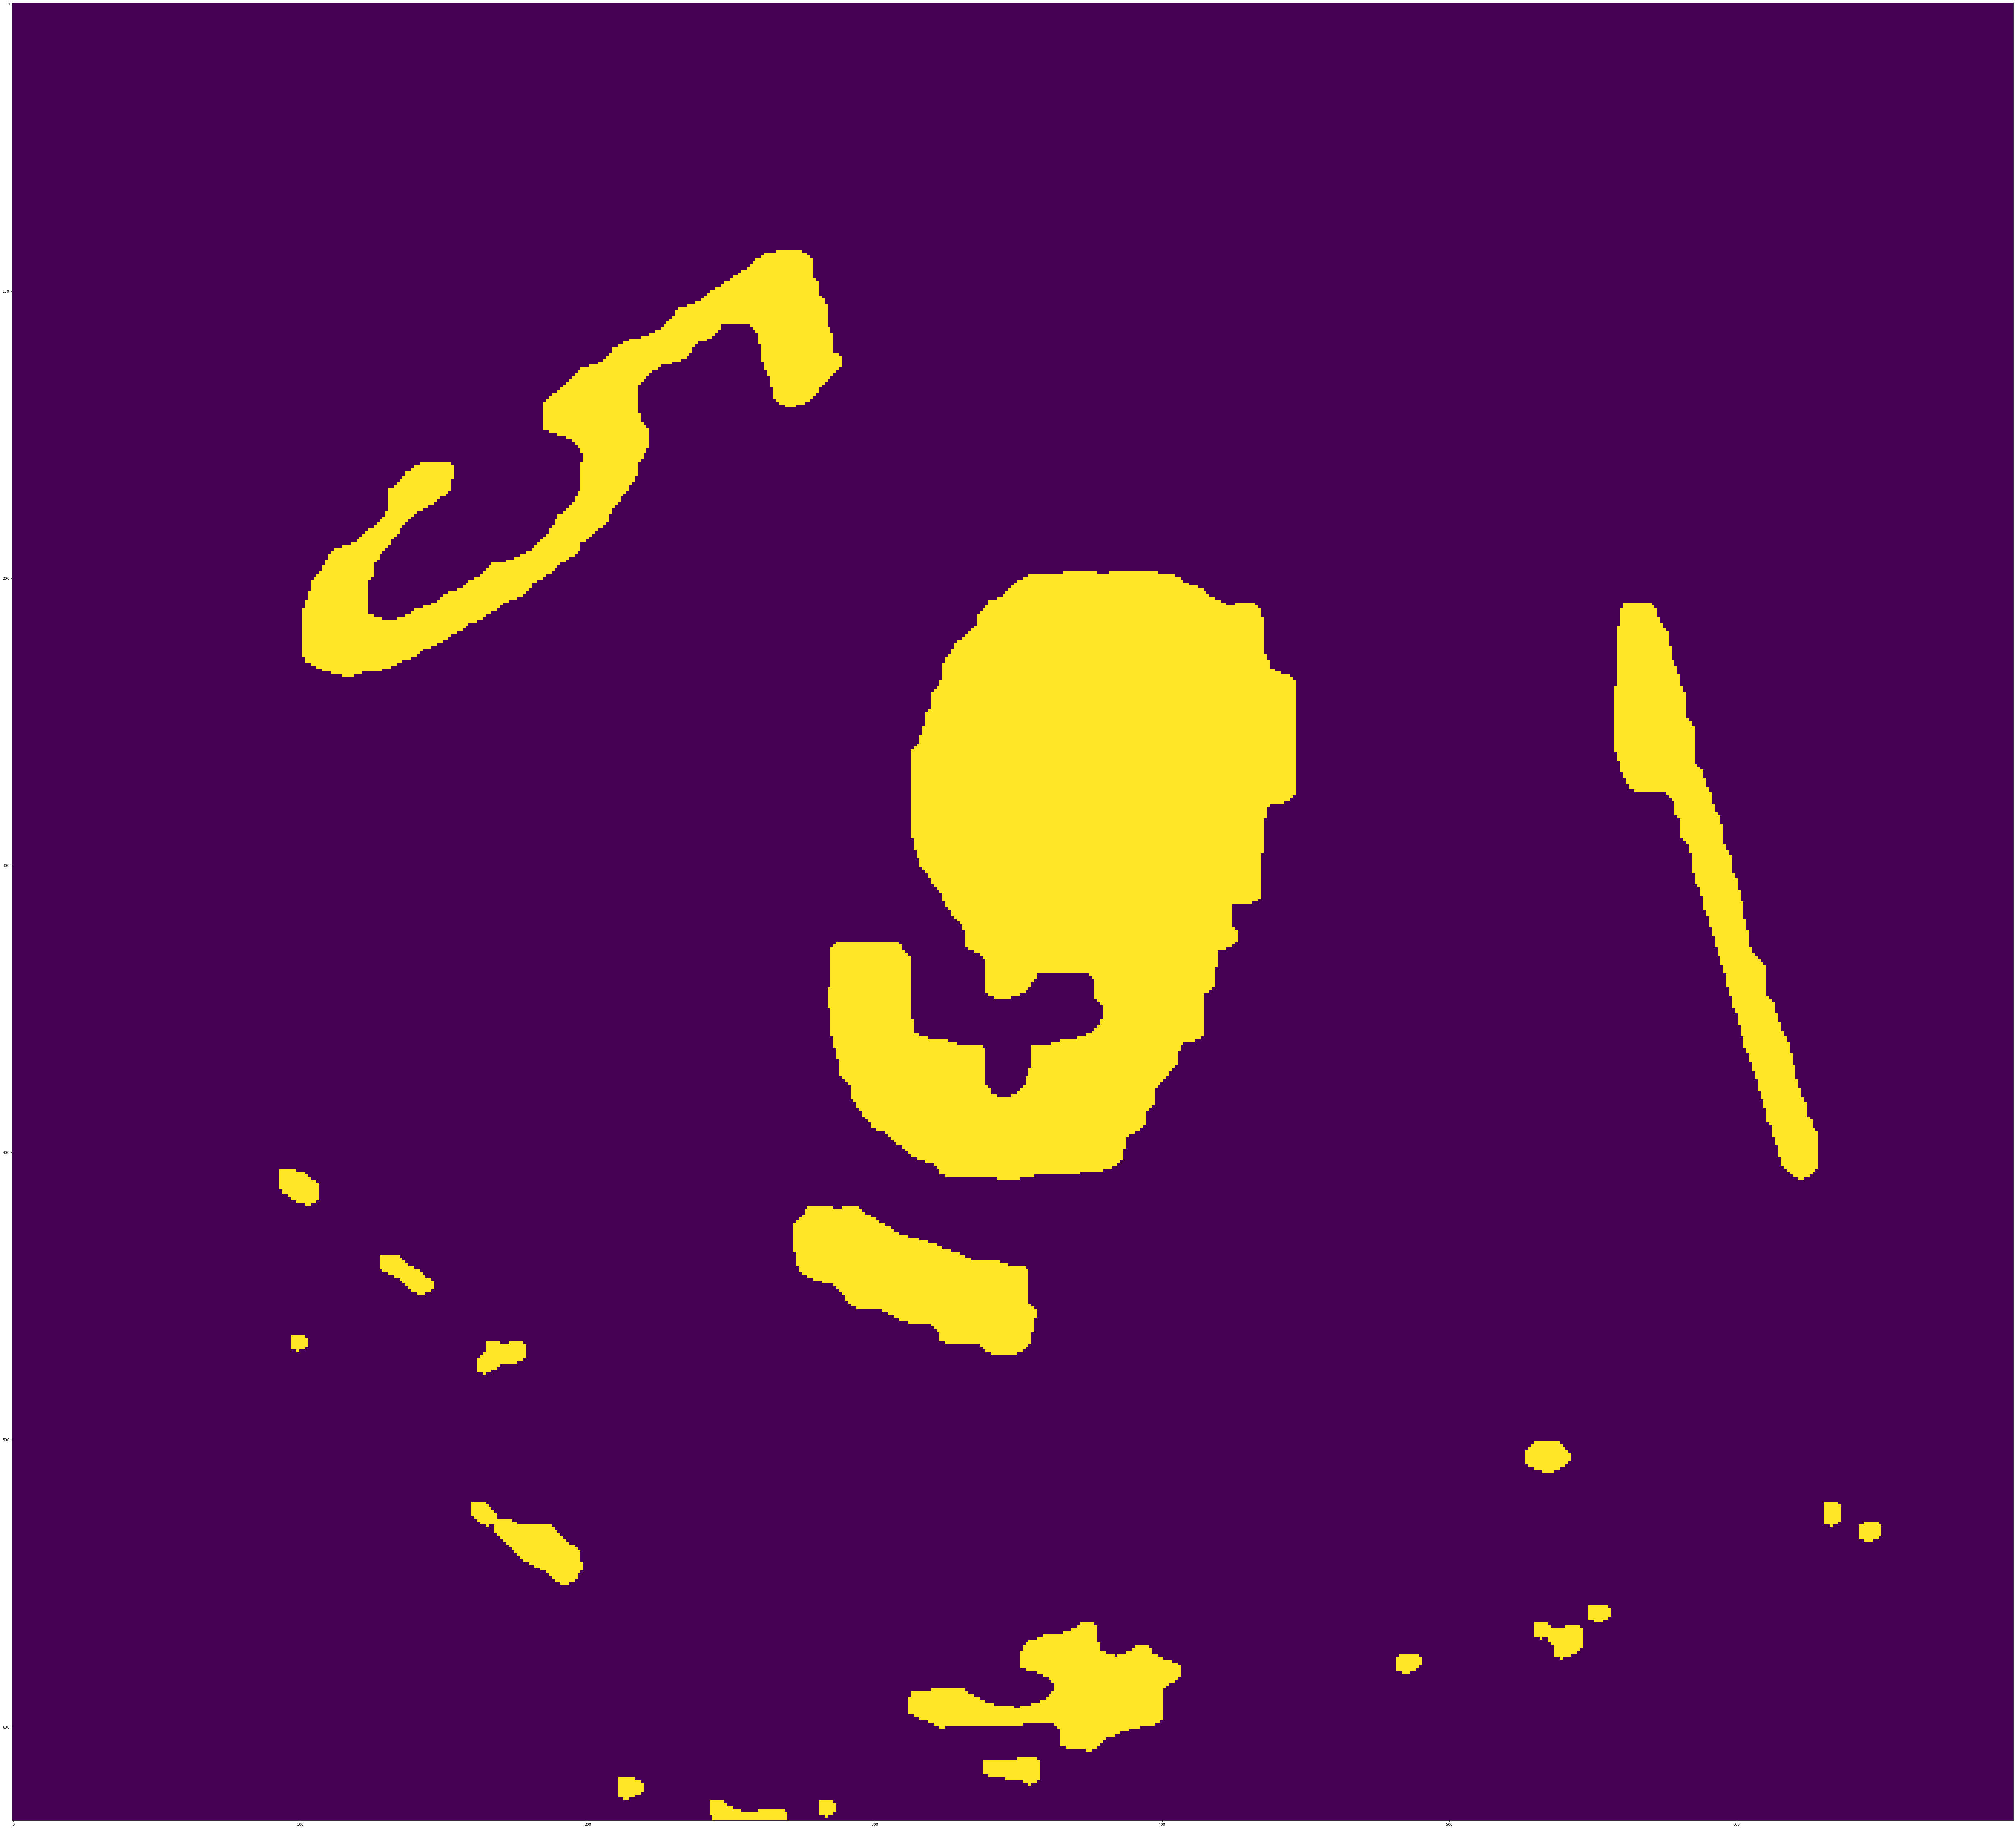

In [589]:
#if debug == 1:
#    plt.figure(figsize=(100,100))
#    plt.imshow(diceMask)
contours, hierarchy = cv2.findContours(diceMask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#if debug == 1:
    #print(contours)
    #print(hierarchy)
h, w = diceMask.shape
sizeOfImage = h*w
contoursWithoutDice = []
for contour in contours:
    #print(cv2.boundingRect(contour))
    #print("cv2.boundingRect(contour)[2]:",cv2.boundingRect(contour)[2],"cv2.boundingRect(contour)[3]",cv2.boundingRect(contour)[3],"*:",cv2.boundingRect(contour)[2]*cv2.boundingRect(contour)[3],"sizeOfImage/2:",sizeOfImage*0.9)
    
    if (cv2.boundingRect(contour)[2]*cv2.boundingRect(contour)[3] < sizeOfImage*0.5):
        contoursWithoutDice.append(contour)
        #print("added")
    #else:
    #    print("not added")
diceMask = np.zeros(shape=diceMask.shape, dtype=np.uint8)
cv2.fillPoly(diceMask,pts=contoursWithoutDice,color=(255))
#diceMask = cv2.erode(diceMask,circle(circleSize))
#diceMask = cv2.dilate(diceMask,circle(circleSize))

contoursWithoutDice, hierarchy = cv2.findContours(diceMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(diceMask,contoursWithoutDice,-1,255,thickness=cv2.FILLED)

circleSize = 6

diceMask = cv2.erode(diceMask,circle(circleSize))
diceMask = cv2.dilate(diceMask,circle(circleSize))

contoursWithoutDice, hierarchy = cv2.findContours(diceMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(diceMask)    

https://theailearner.com/tag/angle-of-rotation-by-cv2-minarearect/

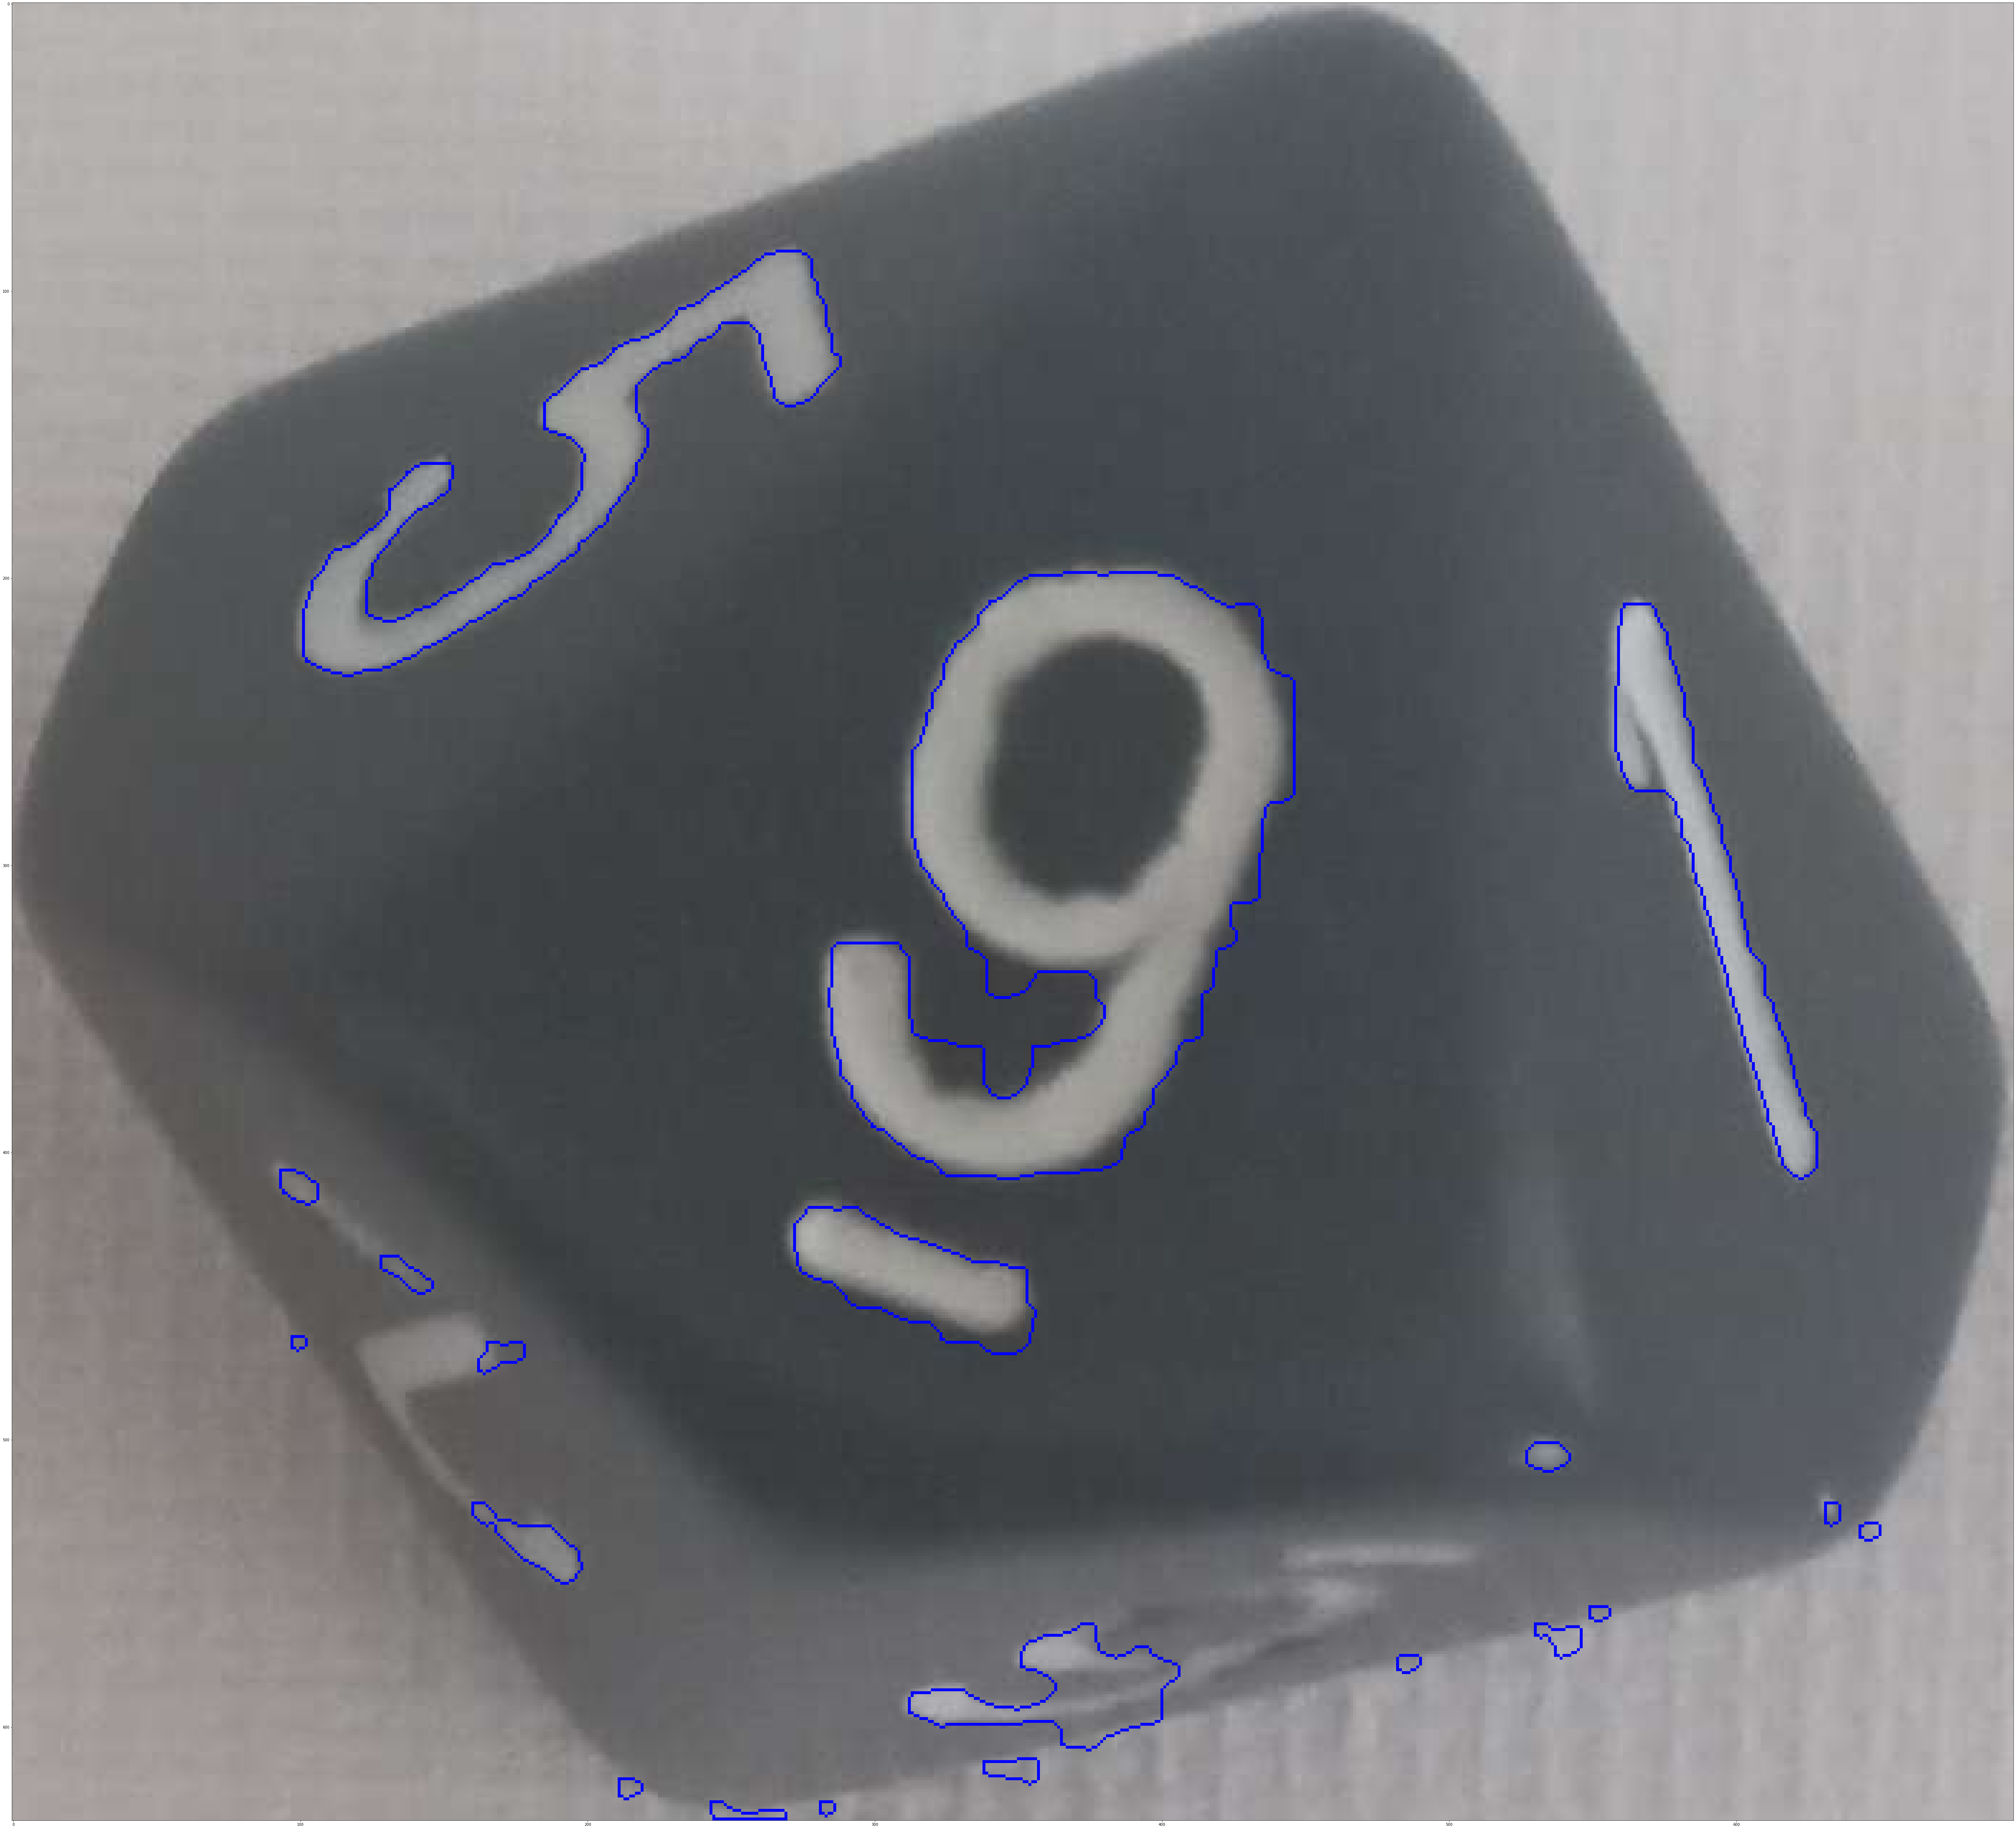

In [590]:
if debug == 1:
    dieRawTemp = copy.deepcopy(dieRaw)
    cv2.drawContours(dieRawTemp,contoursWithoutDice,-1,(0,0,255),1)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

In [591]:
h, w = diceMask.shape
midY, midX = h/2, w/2
closestContur = 0
distance = h+w #always way bigger than anyother possible distance
for contur in contoursWithoutDice:
    for cords in contur:
        print("cords:")
        print(cords)
        x,y = cords[0]
        if distBettweenPoints(x,y,midX,midY) < distance:
            closestContur = contur
            distance = distBettweenPoints(x,y,midX,midY)
            if debug == 1:
                print("distance is now:")
                print(distance)

cords:
[[281 626]]
distance is now:
316.77515685419525
cords:
[[281 630]]
cords:
[[282 630]]
cords:
[[283 631]]
cords:
[[284 630]]
cords:
[[285 630]]
cords:
[[286 629]]
cords:
[[286 627]]
distance is now:
316.7278011163529
cords:
[[285 626]]
distance is now:
315.9469892244583
cords:
[[243 626]]
cords:
[[243 630]]
cords:
[[244 631]]
cords:
[[244 632]]
cords:
[[269 632]]
cords:
[[269 630]]
cords:
[[268 629]]
cords:
[[260 629]]
cords:
[[259 630]]
cords:
[[254 630]]
cords:
[[253 629]]
cords:
[[251 629]]
cords:
[[250 628]]
cords:
[[249 628]]
cords:
[[247 626]]
cords:
[[211 618]]
cords:
[[211 624]]
cords:
[[212 624]]
cords:
[[213 625]]
cords:
[[214 625]]
cords:
[[215 624]]
cords:
[[216 624]]
cords:
[[217 623]]
cords:
[[218 623]]
cords:
[[219 622]]
cords:
[[219 620]]
cords:
[[218 619]]
cords:
[[217 619]]
cords:
[[216 618]]
cords:
[[350 611]]
distance is now:
294.50382000918086
cords:
[[349 612]]
cords:
[[338 612]]
cords:
[[338 616]]
cords:
[[339 616]]
cords:
[[340 617]]
cords:
[[345 617]]
cor

[[134 229]]
cords:
[[135 229]]
cords:
[[136 228]]
cords:
[[138 228]]
cords:
[[139 227]]
cords:
[[140 227]]
cords:
[[143 224]]
cords:
[[145 224]]
cords:
[[146 223]]
cords:
[[147 223]]
cords:
[[148 222]]
cords:
[[149 222]]
cords:
[[150 221]]
cords:
[[151 221]]
cords:
[[153 219]]
cords:
[[154 219]]
cords:
[[155 218]]
cords:
[[156 218]]
cords:
[[159 215]]
cords:
[[161 215]]
cords:
[[162 214]]
cords:
[[163 214]]
cords:
[[165 212]]
cords:
[[166 212]]
cords:
[[167 211]]
cords:
[[168 211]]
cords:
[[171 208]]
cords:
[[172 208]]
cords:
[[173 207]]
cords:
[[175 207]]
cords:
[[176 206]]
cords:
[[177 206]]
cords:
[[180 203]]
cords:
[[180 202]]
cords:
[[181 201]]
cords:
[[182 201]]
cords:
[[183 200]]
cords:
[[184 200]]
cords:
[[186 198]]
cords:
[[187 198]]
cords:
[[191 194]]
cords:
[[192 194]]
cords:
[[194 192]]
cords:
[[195 192]]
cords:
[[197 190]]
cords:
[[197 188]]
cords:
[[198 187]]
cords:
[[199 187]]
cords:
[[204 182]]
cords:
[[205 182]]
cords:
[[207 180]]
cords:
[[207 178]]
cords:
[[208 177]]


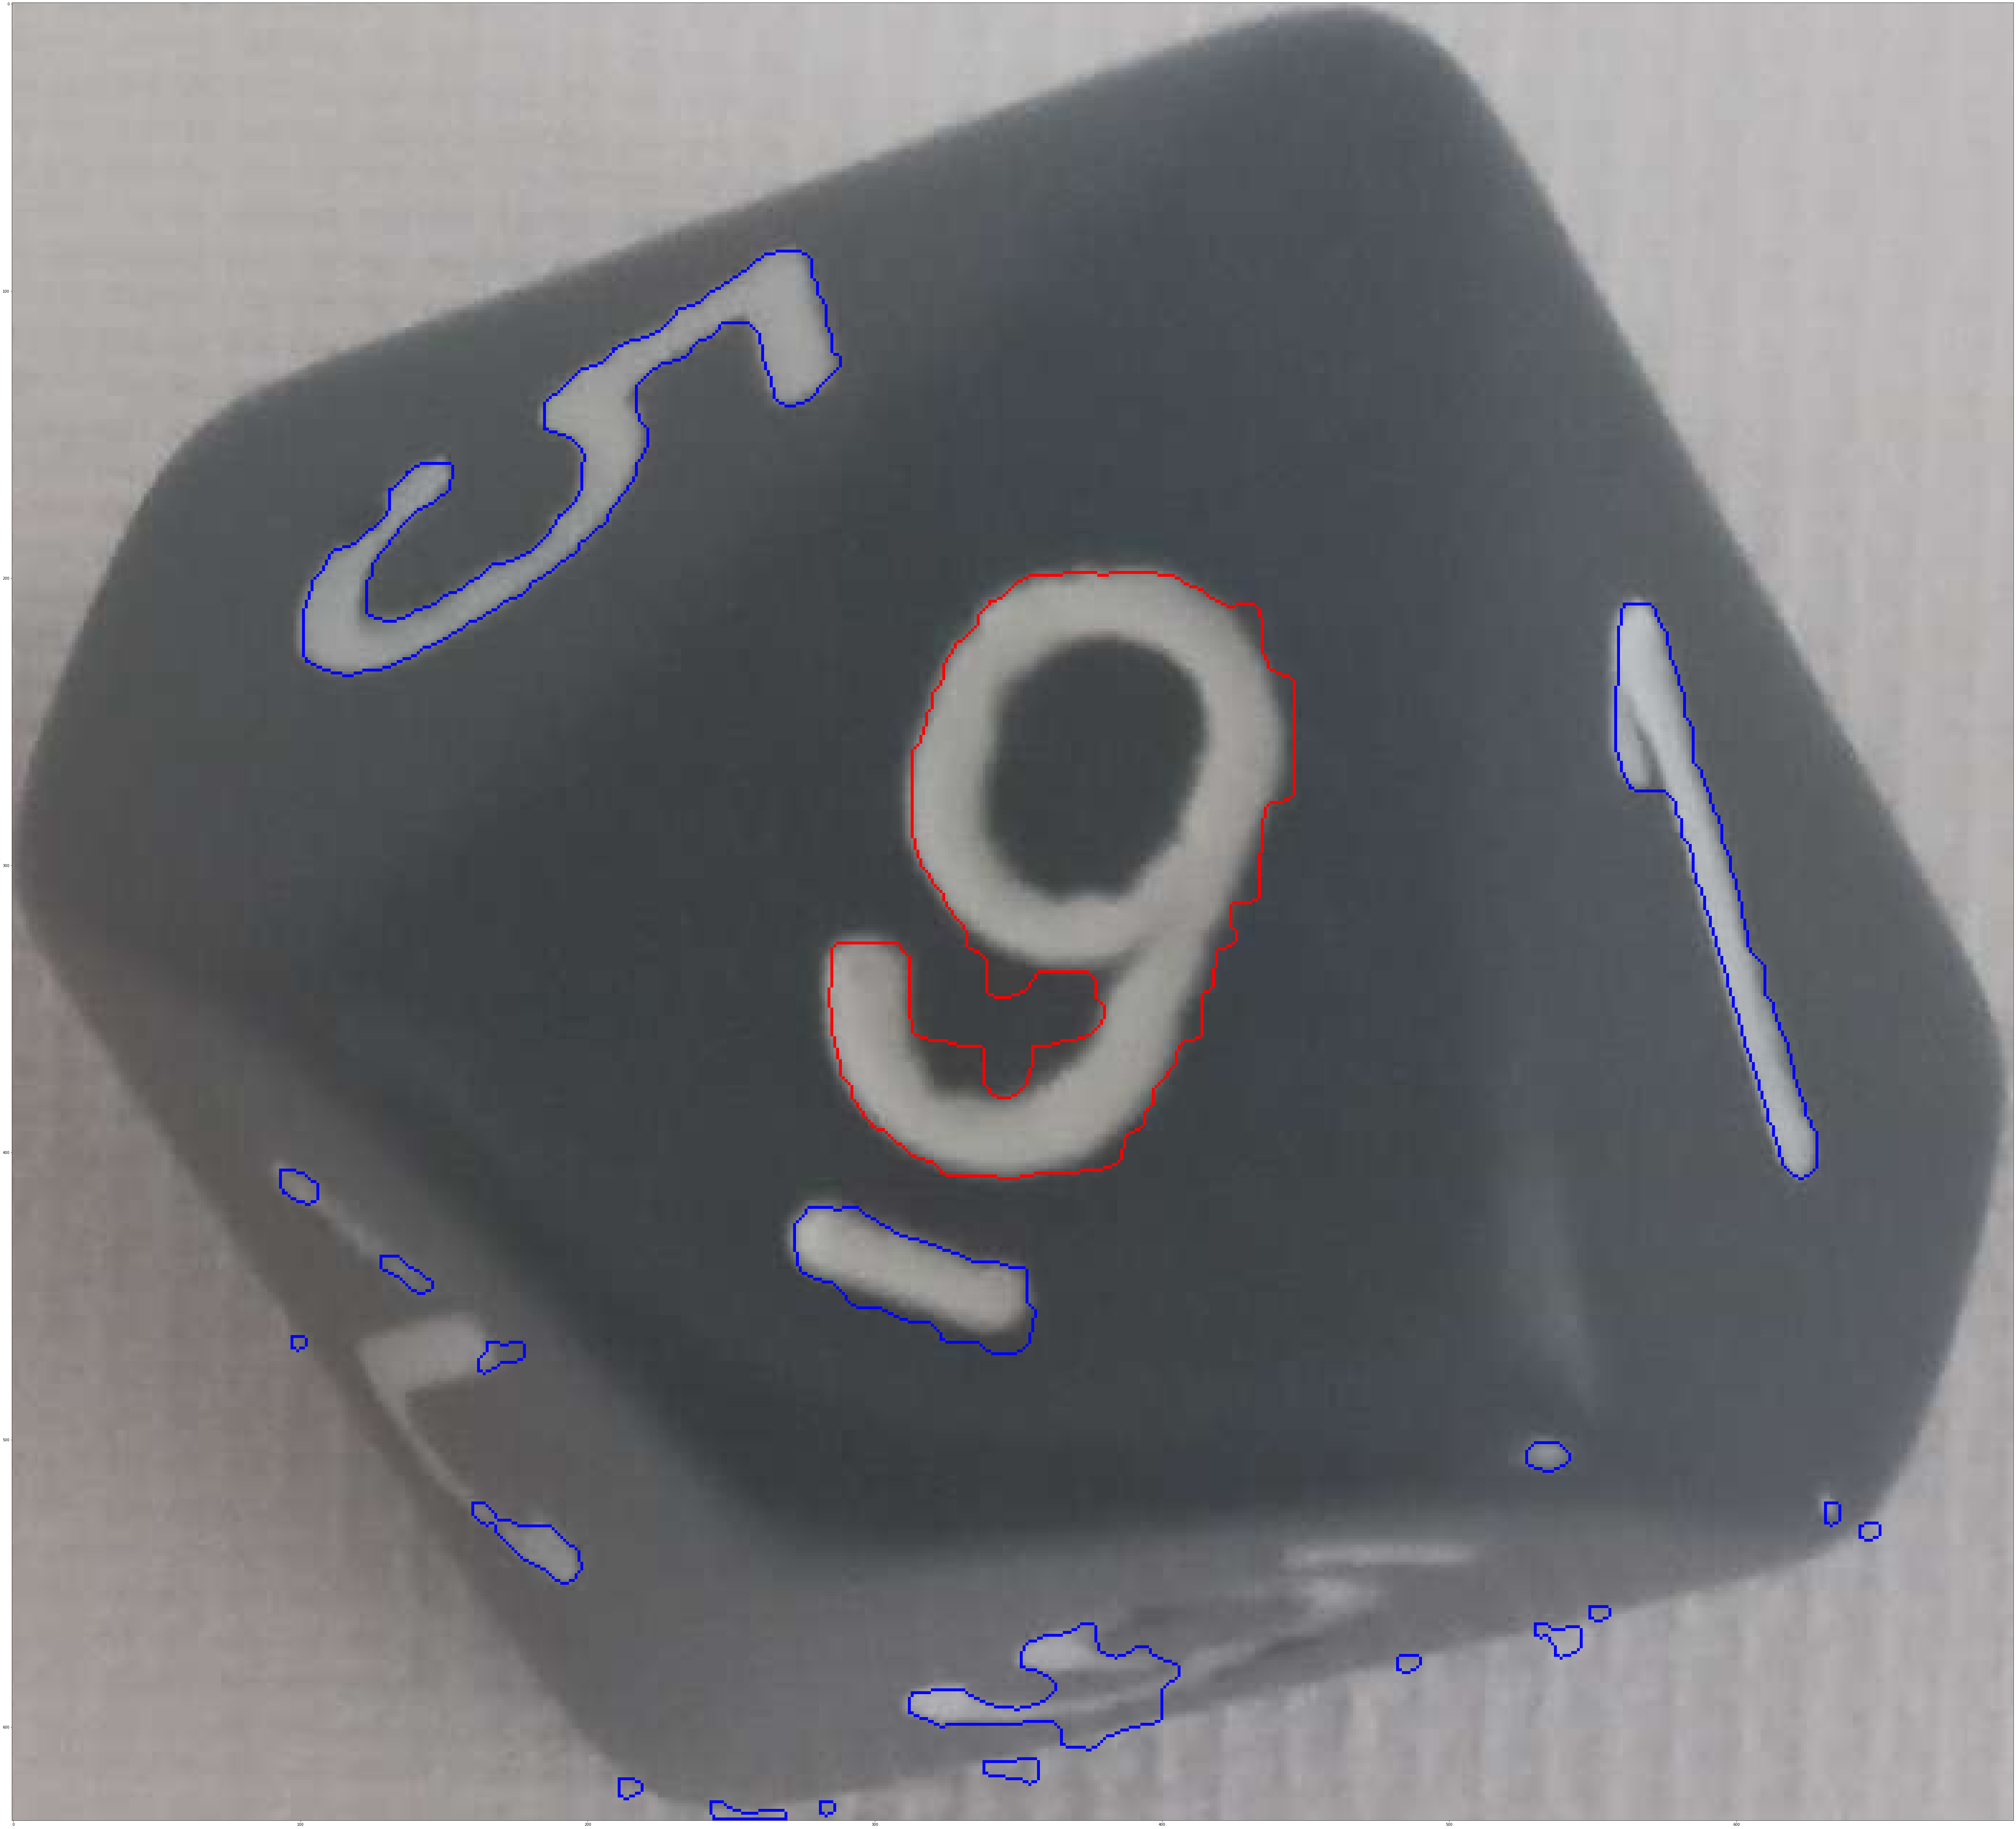

In [592]:
if debug == 1:
    cv2.drawContours(dieRawTemp,[closestContur],-1,(255,0,0),1)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

whats a moment?

In [611]:
def conturMassCenter(contur):
    moment = cv2.moments(contur)
    return (moment['m10'] / (moment['m00'] + 1e-5), moment['m01'] / (moment['m00'] + 1e-5))

def sizeRelativeToImage(contur,image):
    Height,Width = dieRawTemp.shape[:2]
    imageSize = Height*Width
    hull = cv2.convexHull(contur)
    hullArea = cv2.contourArea(hull)
    return hullArea/imageSize

def getHullIfNeeded(contur):
    if not(cv2.isContourConvex(contur)):
        return cv2.convexHull(contur)
    else:
        return contur

def angleBettweenConturs(contur1,contur2):
    hull1 = getHullIfNeeded(contur1)
    hull2 = getHullIfNeeded(contur2)
    [vx1,vy1,x1,y1] = cv2.fitLine(hull1, cv2.DIST_L2,0,0.01,0.01)
    [vx2,vy2,x2,y2] = cv2.fitLine(hull2, cv2.DIST_L2,0,0.01,0.01)
    return angleBettween(vx1,vy1,vx2,vy2)

def angleBettweenContursShouldBe1_6Rad(contur1,contur2):
    hull1 = getHullIfNeeded(contur1)
    hull2 = getHullIfNeeded(contur2)
    [vx1,vy1,x1,y1] = cv2.fitLine(hull1, cv2.DIST_L2,0,0.01,0.01)
    [vx2,vy2,x2,y2] = cv2.fitLine(hull2, cv2.DIST_L2,0,0.01,0.01)
    vx3 = x1 - x2
    vy3 = y1 - y2
    return angleBettween(vx1,vy1,vx3,vy3)

def distBettweenConturs(contur1,contur2):
    point1 = conturMassCenter(contur1)
    point2 = conturMassCenter(contur2)
    dist = distBettweenPoints(point1[0],point1[1],point2[0],point2[1])
    return dist

def pythagoras(x,y):
    x2 = x**2
    y2 = y**2
    return sqrt(x2+y2)

def dotProduct(x1,y1,x2,y2):
    return (x1*x2)+(y1*y2)

def angleBettween(vector1x,vector1y,vector2x,vector2y):    
    vec1Len = pythagoras(vector1x,vector1y)
    vec2Len = pythagoras(vector2x,vector2y)
    
    dotProd = dotProduct(vector1x,vector1y,vector2x,vector2y)
    
    return acos((dotProd[0]/((vec1Len*vec2Len)+1e-5)))
 
def MinBoxAngleDif(contur1,contur2):
    minBox1 = cv2.minAreaRect(contur1)
    minBox2 = cv2.minAreaRect(contur2)
    return minBox1[2]-minBox2[2]

def imgRotate(img,angle):
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))
    return img_rot
    
def confideceOfBeingNumberInital(contur,point,img):
    conturPoint = conturMassCenter(contur)
    distance = distBettweenPoints(conturPoint[0],conturPoint[1],point[0],point[1])
    imageDistance = img
    Height,Width = dieRawTemp.shape[:2]
    AvrageImageLength = (Height*Width)/2
    distRel = distance/AvrageImageLength
    sizeRel = sizeRelativeToImage(contur,img)
    if(0.005<sizeRel):#if it takes up less than half a percent of the image its not a number
        return distRel
    else:
        return 1
    
def devationFrom(number,ideal):
    value =  ideal-number
    if value < 0:
        value = value * -1
    return value

def mapNumbers(orginalNum,OrignalRangeMin,OrignalRangeMax,newRangeMin,newRangeMax):
    #print("           ((",newRangeMin,"-",newRangeMax,")/(",OrignalRangeMin,"-",OrignalRangeMin,"+1e-8 ))*(",orginalNum,"-",OrignalRangeMin,")+",newRangeMin,")")
    #print(np.interp(orginalNum,[OrignalRangeMin,OrignalRangeMax],[newRangeMin,newRangeMax]))
    return np.interp(orginalNum,[OrignalRangeMin,OrignalRangeMax],[newRangeMin,newRangeMax])#(((newRangeMin-newRangeMax)/(OrignalRangeMin-OrignalRangeMin+1e-8))*(orginalNum-OrignalRangeMin)+newRangeMin)

def isAboveORbellow(contur1,contur2): # is contur2 above or below contur 1
    point1 = conturMassCenter(contur1)
    point2 = conturMassCenter(contur2)
    if(point1[1]<point2[1]):
        return 0
    else:
        return 1
    
def confideceOfBeingSecondNumber(conturCenter,conturPossible,img):
    sizeScore = -100000000000000000000000000
    score = -100000000000000000000000000
    distScore = -100000000000000000000000000
    dist = distBettweenConturs(conturCenter,conturPossible)
    linedUpLineAngle = angleBettweenConturs(conturCenter,conturPossible)
    RightAngleLine = angleBettweenContursShouldBe1_6Rad(conturCenter,conturPossible)
    boxAngle = MinBoxAngleDif(conturCenter,conturPossible)
    conturCenterSize = sizeRelativeToImage(conturCenter,img)
    conturPosiblSize = sizeRelativeToImage(conturPossible,img)
    Height,Width = dieRawTemp.shape[:2]
    AvrageImageLength = (Height*Width)/2
    #now that weve got everything we want to use in our comparsions lets combine it
    #angles
    #print("  linedUpLineAngle",linedUpLineAngle*57.29578)
    #print("  RightAngleLine",RightAngleLine*57.29578)
    #print("  boxAngle",boxAngle)
    distRel = dist/AvrageImageLength
    if(distRel < 0.25):
        distScore = mapNumbers(distRel,0,0.25,100,0)
    
    if (linedUpLineAngle<0.174 and RightAngleLine>1.45 and RightAngleLine<1.75) or (boxAngle<10 and boxAngle>-10):
        #angle is good add somthing based on how good it is
        
        #print("linedUpLineAngle",linedUpLineAngle)
        linedUpLineAngle = mapNumbers(linedUpLineAngle,0,0.174,50,0)
        devation = devationFrom(RightAngleLine,1.6)
        #print("devation",devation)
        devation = mapNumbers(devation,0,0.15,50,0)
        
        boxDevation = devationFrom(boxAngle,0)
        #print("boxDevation",boxDevation)
        boxScore = mapNumbers(boxDevation,0,10,100,0)
        
        angleScore = linedUpLineAngle+devation
        
        if angleScore < boxScore:
            score = angleScore
        else:
            score = boxScore
        #print("  score",score)
    sizeRatio = conturCenterSize/conturPosiblSize
    if (sizeRatio<4 and sizeRatio>0.25):
        #size is alright add somthing based on how good it is
        #print("  sizeRatio",sizeRatio)
        if sizeRatio>1:
            sizeScore = mapNumbers(sizeRatio,1,5,100,0)
        else:
            sizeScore = mapNumbers(sizeRatio,1,0.25,100,0)
        #print("  sizeScore",sizeScore)
    #else:
        #print("size ratio was to big/small:",sizeRatio)
    return sizeScore + score

find the starting Num

In [594]:
bestContur = 0
bestConturdist = 1
h, w = diceMask.shape
midY, midX = h/2, w/2
for contur in contoursWithoutDice:
    if confideceOfBeingNumberInital(contur,(midY, midX),dieRaw) < bestConturdist:
        bestConturdist = confideceOfBeingNumberInital(contur,(midY, midX),dieRaw)
        bestContur = contur
#rprint(bestContur)

In [595]:
bestSecondContur = 0
bestSecondScore = 0
i = 0
for contur in contoursWithoutDice:
    #print("testing contur",i)
    i = i + 1
    if not(conturMassCenter(contur) == conturMassCenter(bestContur)):
        if confideceOfBeingSecondNumber(bestContur,contur,dieRaw) > bestSecondScore:
            bestSecondContur = contur
            bestSecondScore = confideceOfBeingSecondNumber(bestContur,contur,dieRaw)
            #print("new best score is:",bestSecondScore)
        #else:
            #print("score remains at:",bestSecondScore)


0


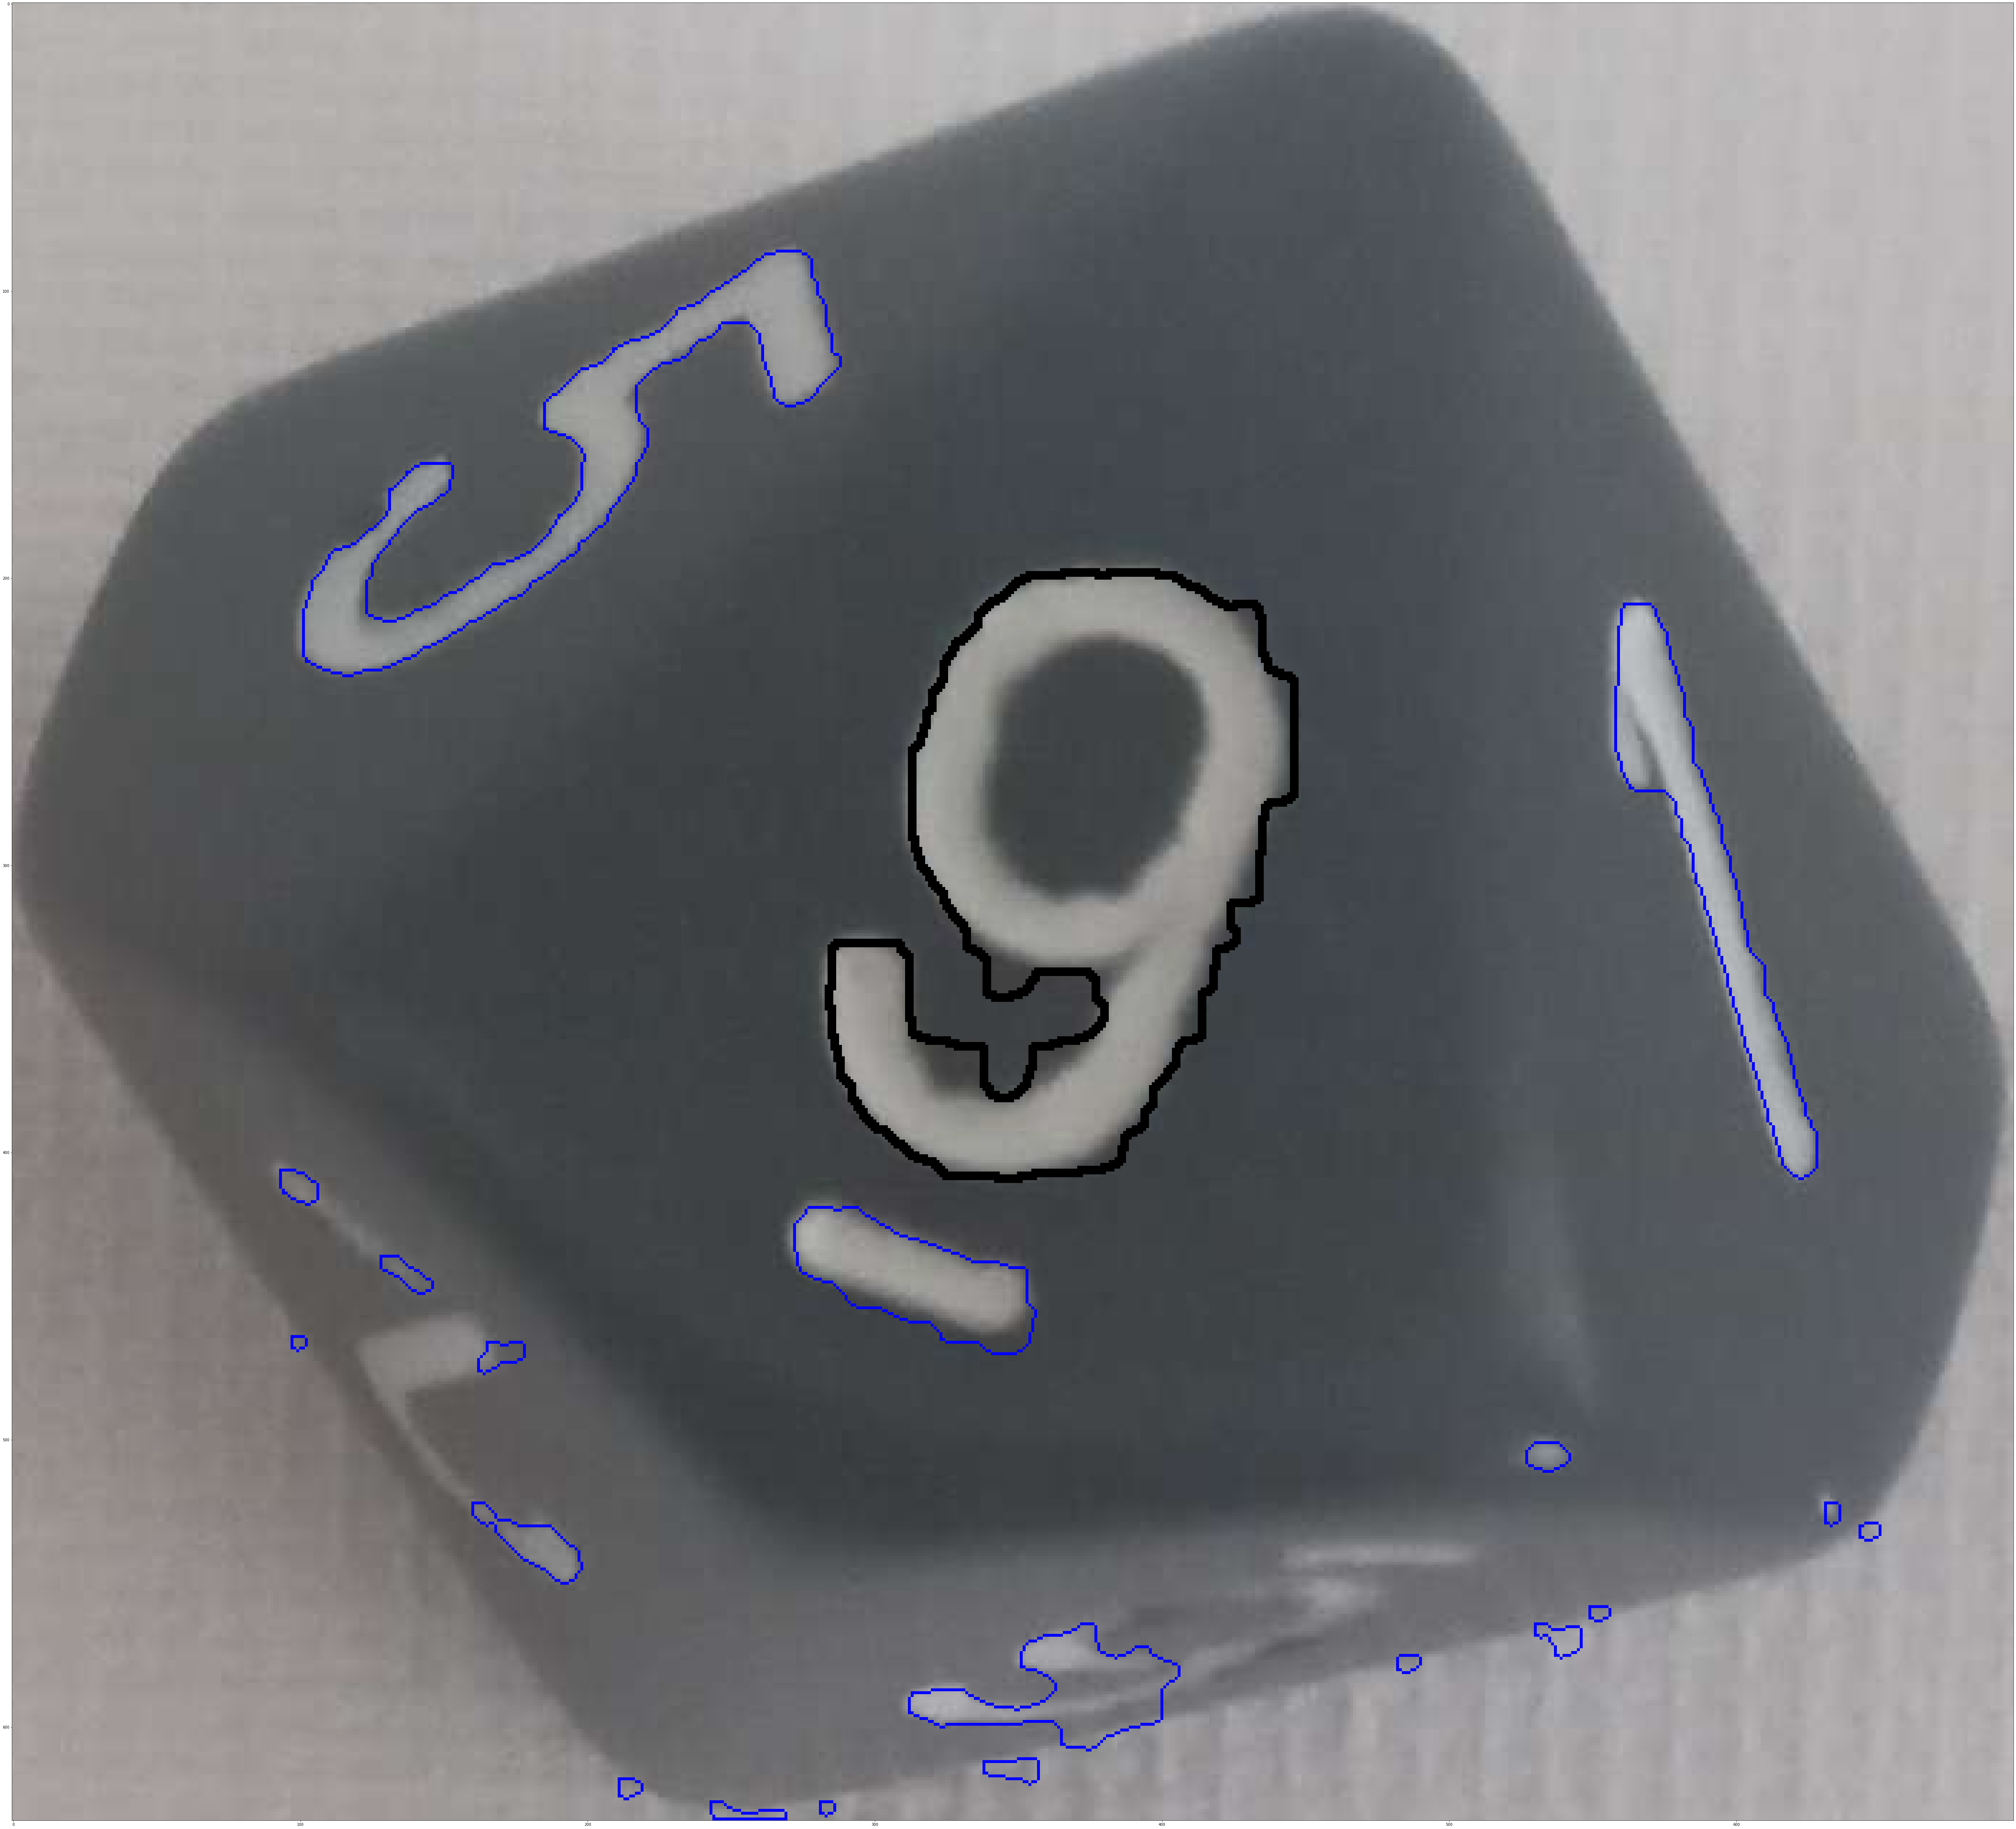

In [597]:
#print(bestSecondContur)
if debug == 1:
    print(bestSecondScore)

    cv2.drawContours(dieRawTemp,[bestContur],-1,(0,0,0),2)
    if not bestSecondScore == 0:
        cv2.drawContours(dieRawTemp,[bestSecondContur],-1,(255,255,255),2)
    
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

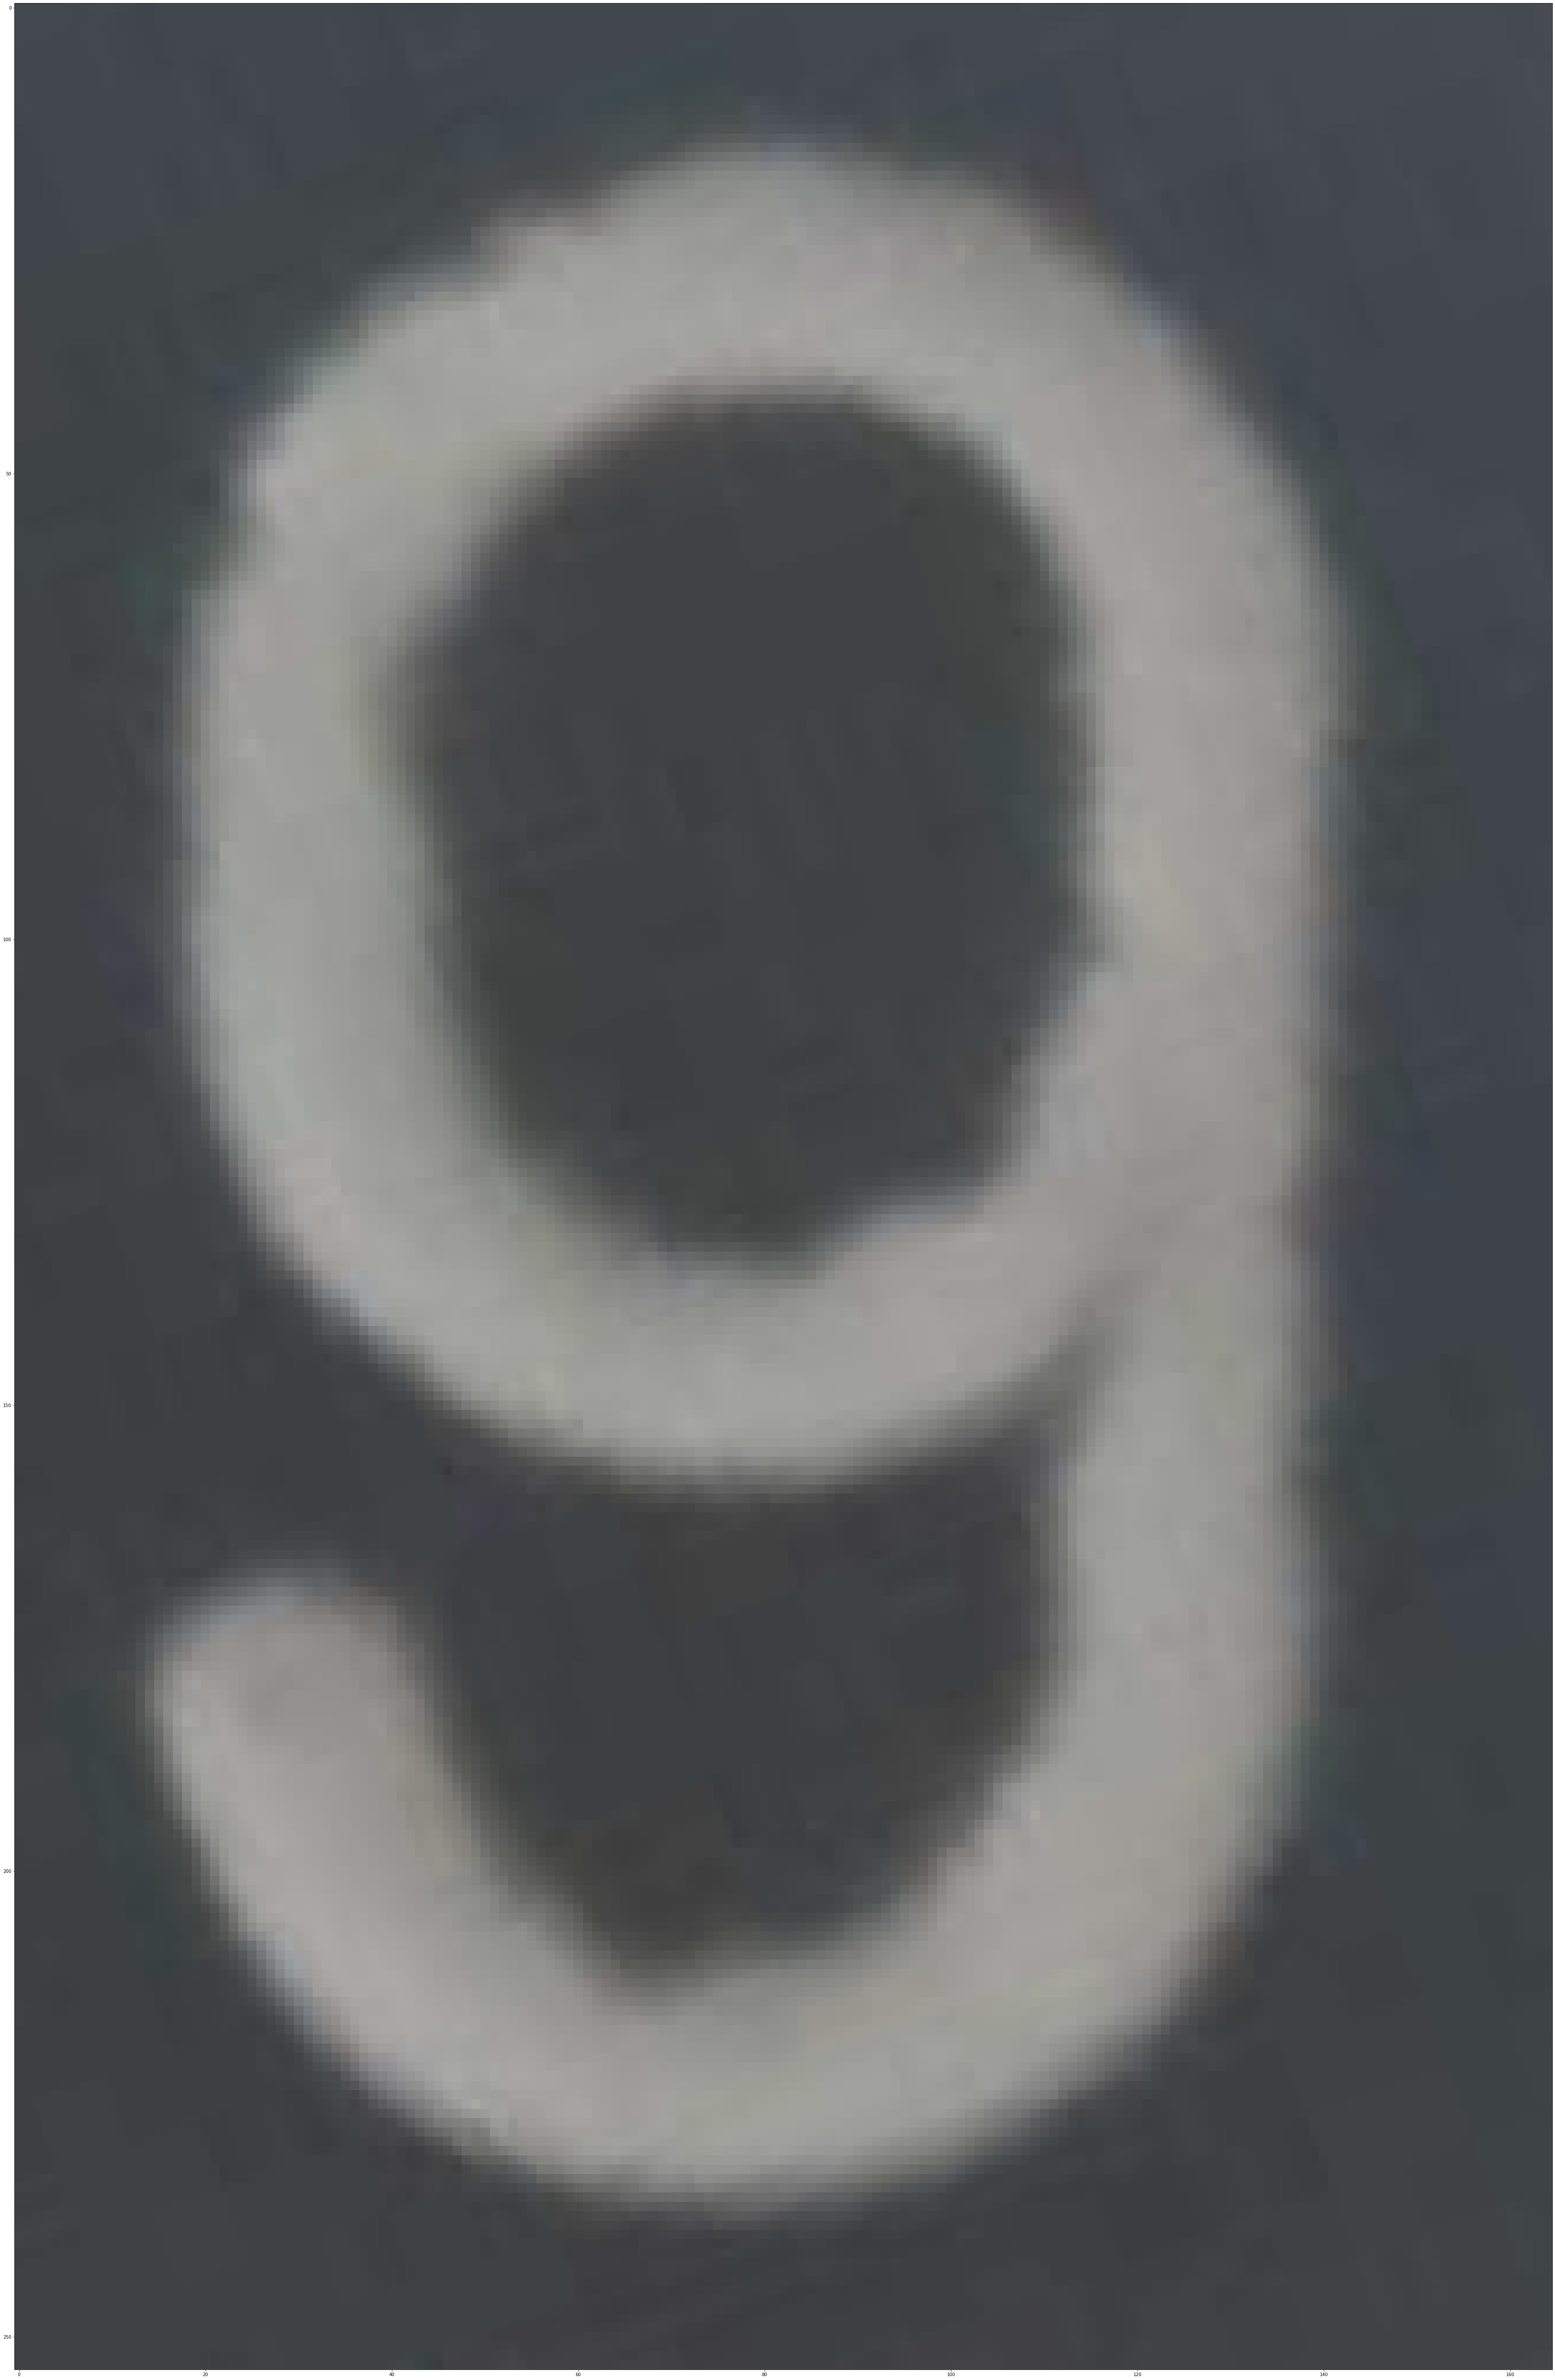

In [598]:
#first rotate the conturs to fit the line
maskOfConturs = np.zeros(shape=diceMask.shape, dtype=np.uint8)
contursToDraw = 0
if bestSecondScore != 0:
    contursToDraw = [bestContur,bestSecondContur]
else:
    contursToDraw = [bestContur]

cv2.drawContours(maskOfConturs,contursToDraw,-1,255,thickness=cv2.FILLED)

[vx1,vy1,x1,y1] = cv2.fitLine(bestContur, cv2.DIST_L2,0,0.01,0.01)
angleToRoateBy = angleBettween(vx1,vy1,0,-1)

angleToRoateBy = angleToRoateBy%math.pi
maskOfConturs = imgRotate(maskOfConturs,(angleToRoateBy*57.29578))
imageRoated = imgRotate(dieRaw,(angleToRoateBy*57.29578))
(t,maskOfConturs) = cv2.threshold(maskOfConturs,100, 255, cv2.THRESH_BINARY)
contursToCropTo,hierarchy = cv2.findContours(maskOfConturs, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

best = contursToCropTo[0]
x1,y1,w,h = cv2.boundingRect(best)
x2 = x1+w
y2 = y1+h
xMin = min(x1,x2)
yMin = min(y1,y2)
xMax = max(x1,x2)
yMax = max(y1,y2)

if bestSecondScore != 0:
    best = contursToCropTo[1]
    x3,y3,w,h = cv2.boundingRect(best)
    x4 = x3+w
    y4 = y3+h
    xMin = min(x1,x2,x3,x4)
    yMin = min(y1,y2,y3,y4)
    xMax = max(x1,x2,x3,x4)
    yMax = max(y1,y2,y3,y4)

buffer = 15
finalImage = imageRoated[yMin-buffer:yMax+buffer,xMin-buffer:xMax+buffer]

plt.figure(figsize=(100,100))
plt.imshow(finalImage)
#if theres a second contur combine them
#if bestSecondScore > 0:
#    rows,cols = img.shape[0], img.shape[1]
#    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
#    img_rot = cv2.warpAffine(img,M,(cols,rows))
#else:

#find the max x,y and min x,y and make the box

#rotate the image to fit the line

#crop to the box
#flip the box
#tada!

if prefrecnce for which way up - 3 hours
    find the closest contur
    is it above or below on each roation
    same cheap draw the conturs trick
    use bounding boxes and just get avrage value
    make sure its atleast like 10% of the main contur and biger than 50% if it is its problay a digit
    then relase two images (the image croped and rotated 180 with a prefrence digt -1 for none)
after that combine - 1
    number detection works like this:
        if its 0,1,2,3,4,5,7,8
            np use as is
        if its 6,9
            check prefrence roation use that one
        if its > 20 flip the number around so 91 becomes 19
    done then done - 2 hours
    blog writeup
then go and work on security - 1 hour

5 hours of essay writing

1 hour for presnation
7 hours for essay and coding

hell

In [612]:
prefrence = -1
closestSecondContur = 0
h, w = diceMask.shape
distance = h+w
if bestSecondScore == 0:#6&9 are 1 digit
    bestConturPoint = conturMassCenter(bestContur)
    for contur in contoursWithoutDice:
        conturPoint = conturMassCenter(contur)
        if bestConturPoint != conturPoint:
            distTemp = distBettweenPoints(conturPoint[0],conturPoint[1],bestConturPoint[0],bestConturPoint[1])
            if distance > distTemp:
                distance = distTemp
                closestSecondContur = contur
    maskOfConturs = np.zeros(shape=diceMask.shape, dtype=np.uint8)
    contursToDraw = [bestContur,closestSecondContur]
    cv2.drawContours(maskOfConturs,contursToDraw,-1,255,thickness=cv2.FILLED)
    maskOfConturs = imgRotate(maskOfConturs,(angleToRoateBy*57.29578))
    contursToCheck,hierarchy = cv2.findContours(maskOfConturs, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #get the bigest contur
    if cv2.contourArea(cv2.convexHull(contursToCheck[0])) > cv2.contourArea(cv2.convexHull(contursToCheck[1])):
        prefrence = isAboveORbellow(contursToCheck[0],contursToCheck[1])
    else:
        prefrence = isAboveORbellow(contursToCheck[1],contursToCheck[0])

[finalImage,cv2.rotate(finalImage, cv2.ROTATE_180),prefrence]

0


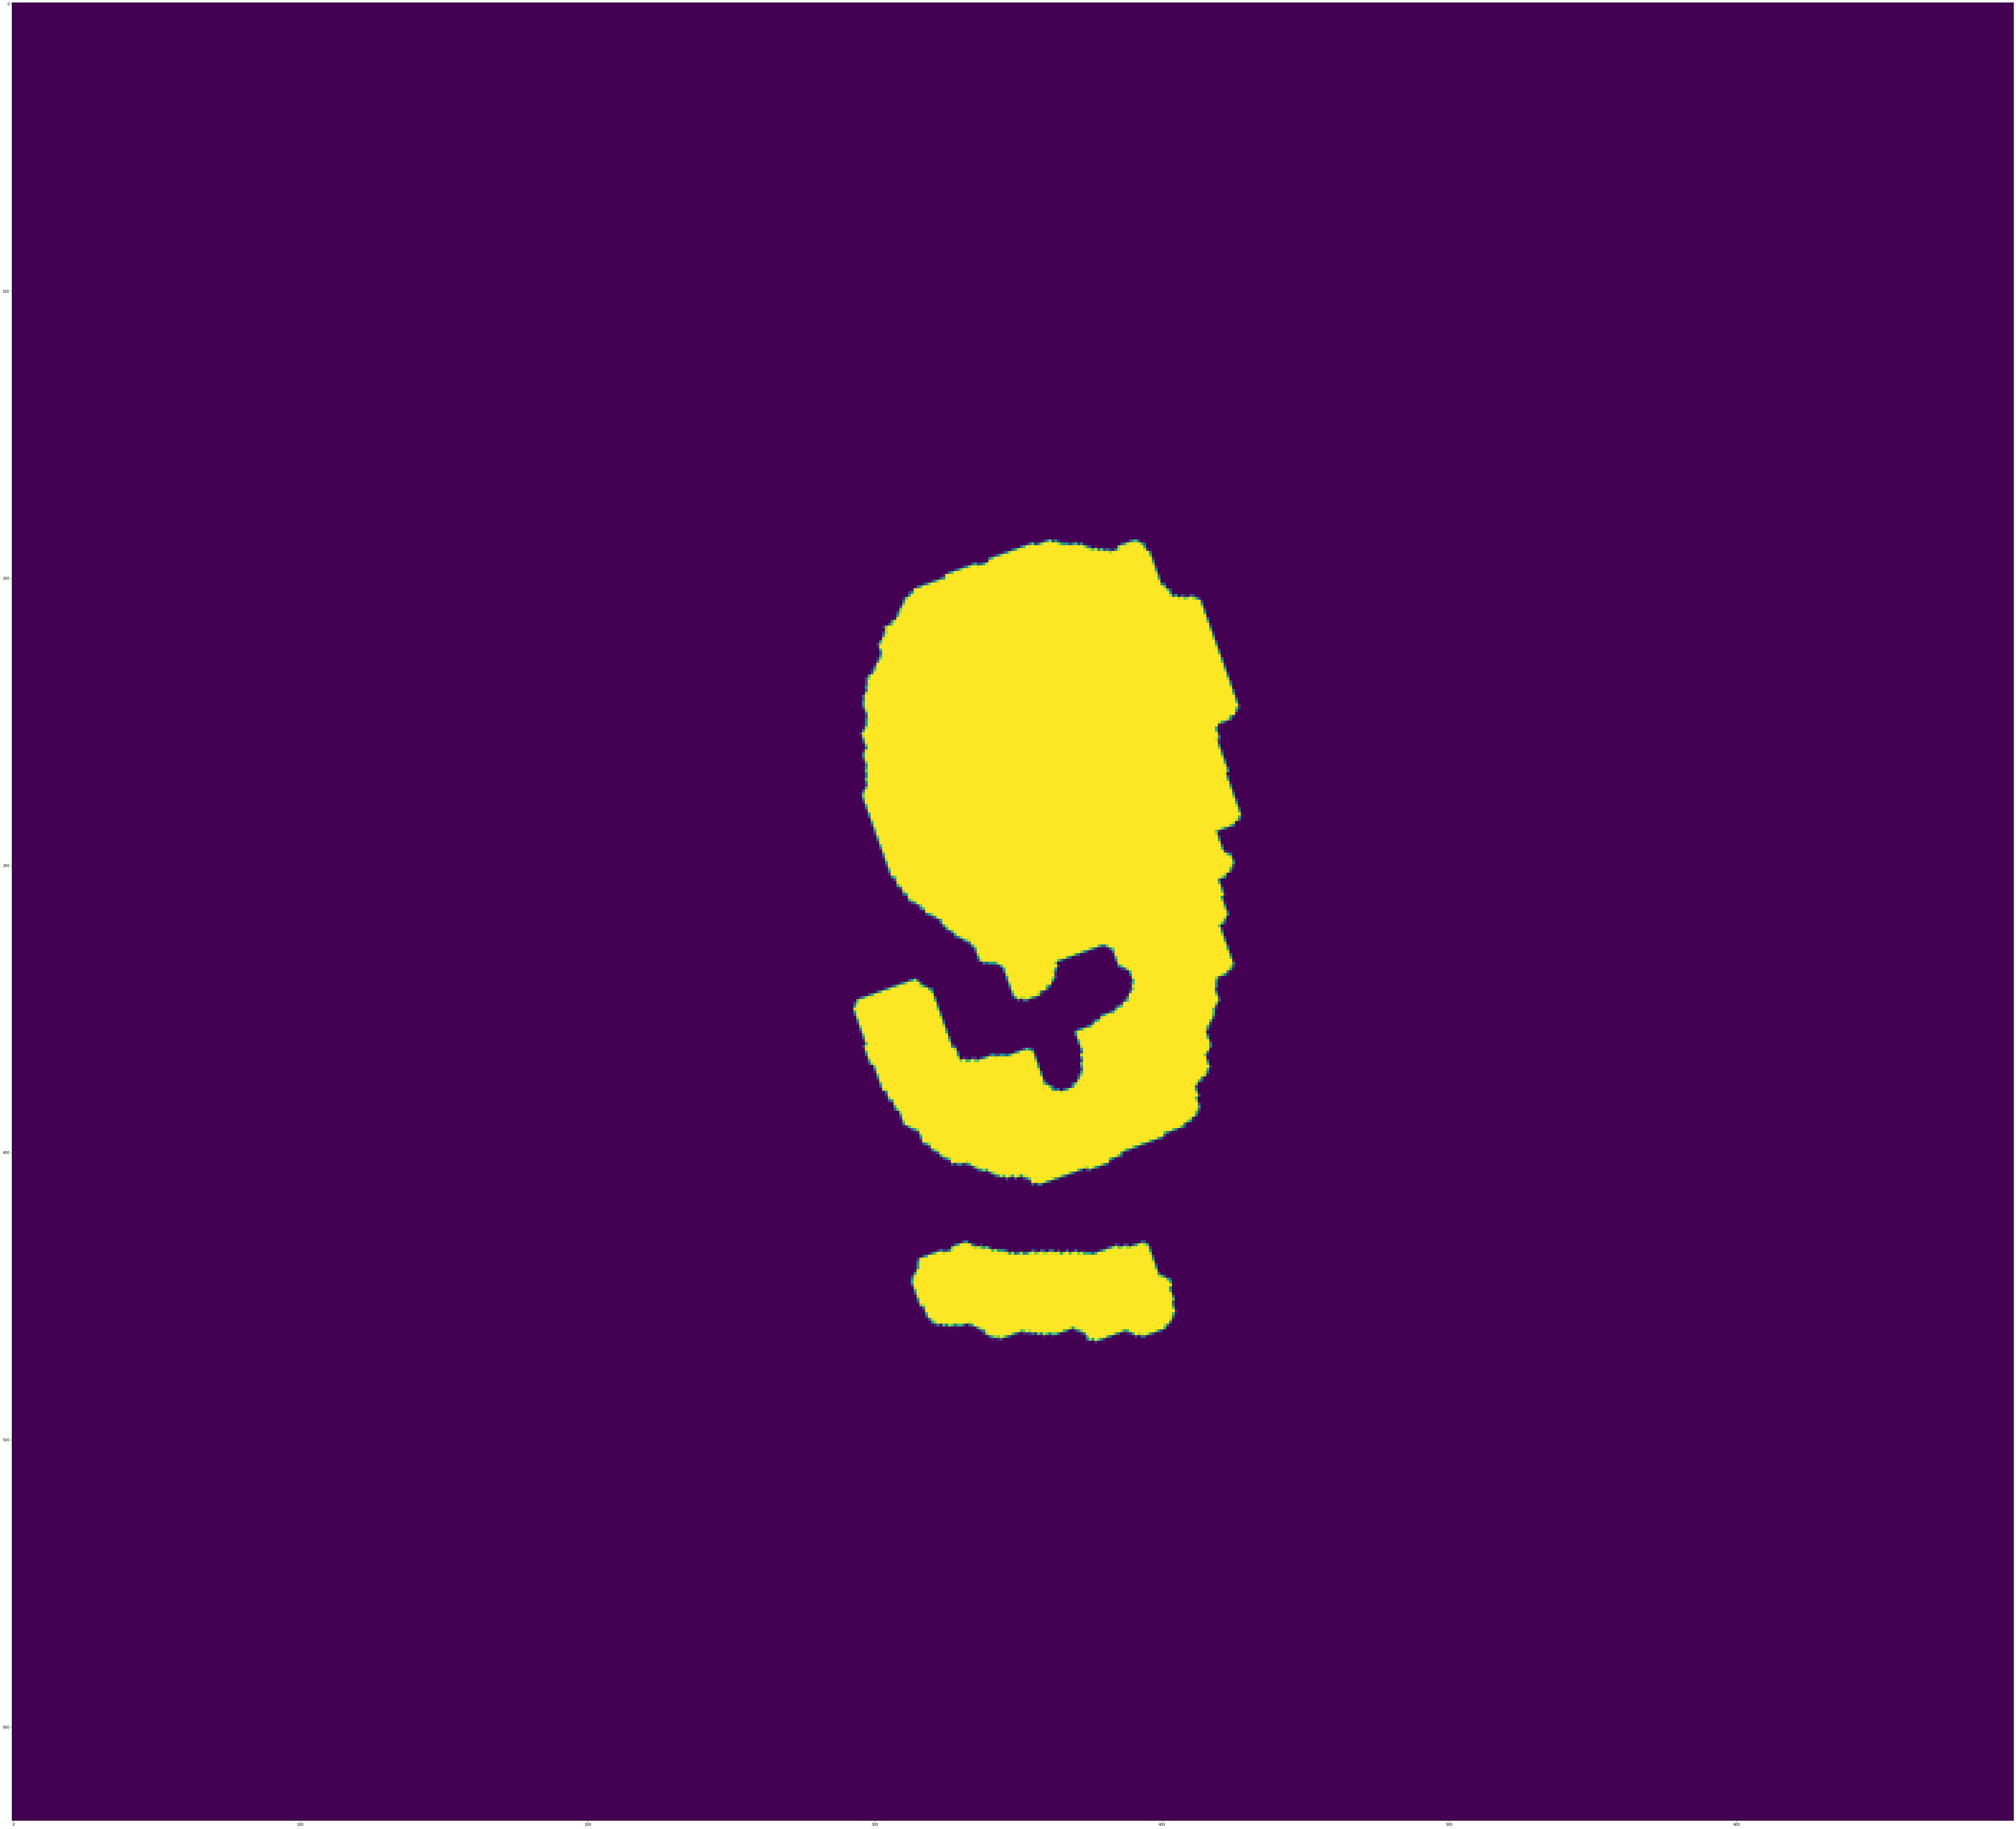

In [613]:
if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(maskOfConturs)

In [600]:
centerMoment = cv2.moments(closestContur)
if debug == 1:
    print(centerMoment)
centerMomentMassCenter = conturMassCenter(closestContur)
if debug == 1:
    print(centerMomentMassCenter)

#sourced from:
# Get the moments
mu = [None]*len(contoursWithoutDice)
for i in range(len(contoursWithoutDice)):
    mu[i] = cv2.moments(contoursWithoutDice[i])

    # Get the mass centers
mc = [None]*len(contoursWithoutDice)
for i in range(len(contoursWithoutDice)):
    # add 1e-5 to avoid division by zero
    mc[i] = (mu[i]['m10'] / (mu[i]['m00'] + 1e-5), mu[i]['m01'] / (mu[i]['m00'] + 1e-5))
if debug == 1:
    print(mc)

{'m00': 21403.5, 'm10': 7918247.5, 'm01': 6368142.5, 'm20': 2959597916.583333, 'm11': 2340064841.125, 'm02': 1963987723.25, 'm30': 1117111695646.6501, 'm21': 869038515575.0166, 'm12': 716749687863.05, 'm03': 626367298441.55, 'mu20': 30233865.318060875, 'mu11': -15836223.199468136, 'mu02': 69286440.73516583, 'mu30': -164790018.37329102, 'mu21': 192251833.64170074, 'mu12': -406208493.2920189, 'mu03': 796455086.7133789, 'nu20': 0.06599698262206537, 'nu11': -0.034568618213368416, 'nu02': 0.15124417526633285, 'nu30': -0.0024587756845962315, 'nu21': 0.0028685240680443357, 'nu12': -0.006060898445441085, 'nu03': 0.011883634824578907}
(369.95105923332585, 297.5280910610283)
[(283.3665249834042, 628.1163526084903), (254.11997095771758, 630.0018327616953), (214.53783002928103, 621.1551618586752), (348.63273881643454, 614.797970497347), (485.7582118937803, 577.683188912536), (539.2064419581319, 569.1548168889542), (367.78992947738334, 587.4647385482247), (552.344260329691, 560.2442576963585), (646

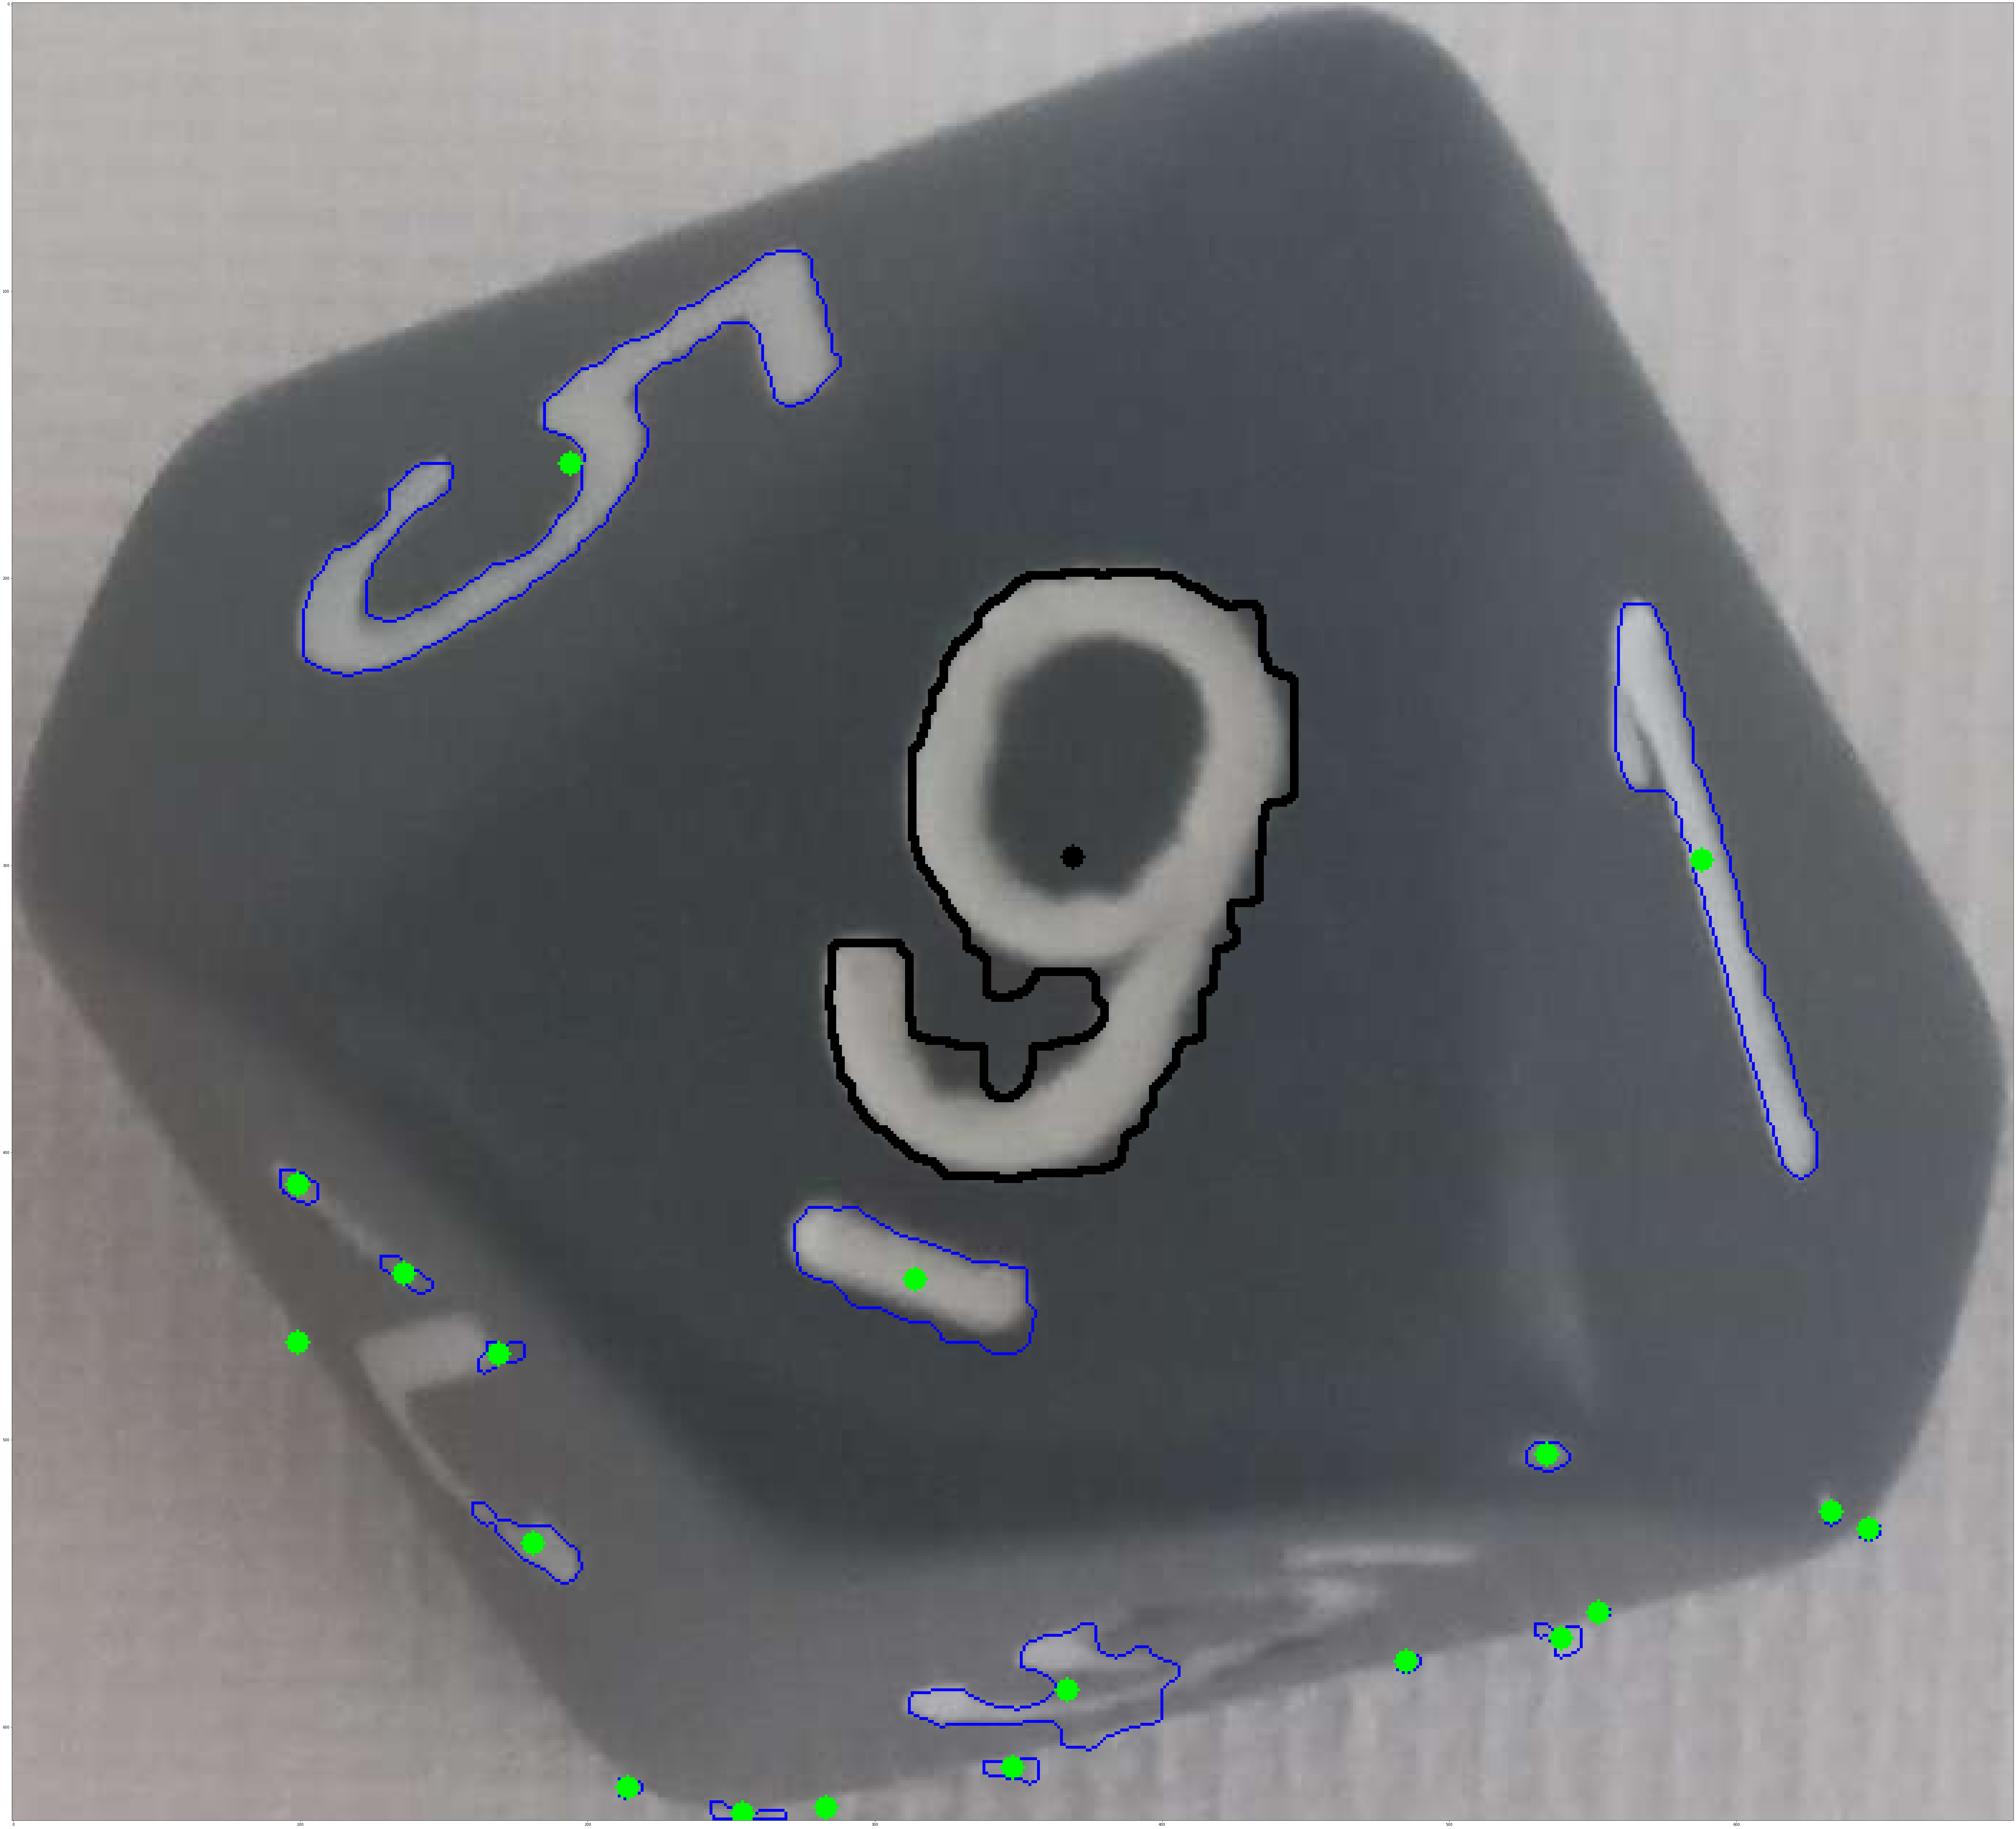

In [615]:
if debug == 1:
    for i in range(len(contoursWithoutDice)):
        cv2.circle(dieRawTemp, (int(mc[i][0]), int(mc[i][1])), 4, (0,255,0), -1)
    cv2.circle(dieRawTemp,(int(centerMomentMassCenter[0]),int(centerMomentMassCenter[1])),4,(0,0,0),-1)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

illustrated above is a problem spefilcy the 9 with two dots inside of it
the following code works around this but really this problem should be fixed using hirarcys
https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html
\<refactor using this might make faster code

In [614]:
distance = h+w #always way bigger than anyother possible distance

xCord1 = centerMomentMassCenter[0]
yCord1 = centerMomentMassCenter[1]
secondClosestCord = 0
secondClosestCordIndex = 0
i = 0
for cords in mc:
    xCord2 = cords[0]
    yCord2 = cords[1]
    if distBettweenPoints(xCord1,yCord1,xCord2,yCord2) < distance and cords != centerMomentMassCenter and cv2.pointPolygonTest(contour=closestContur,pt=cords,measureDist=False)==-1:
        secondClosestCord = cords
        secondClosestCordIndex = i
        distance = distBettweenPoints(xCord1,yCord1,xCord2,yCord2)
        
        
    i += 1
    
print(secondClosestCord)
print(secondClosestCordIndex)
print(distance)

(314.351512531049, 444.16609885045506)
15
156.8247905209844


time to use this https://theailearner.com/tag/angle-of-rotation-by-cv2-minarearect/

vx1: [0.01516447] vy1: [0.999885] x: [202.3] y: [171.85]
vx2: [0.02134848] vy2: [0.9997721] x: [133.5] y: [172.6]


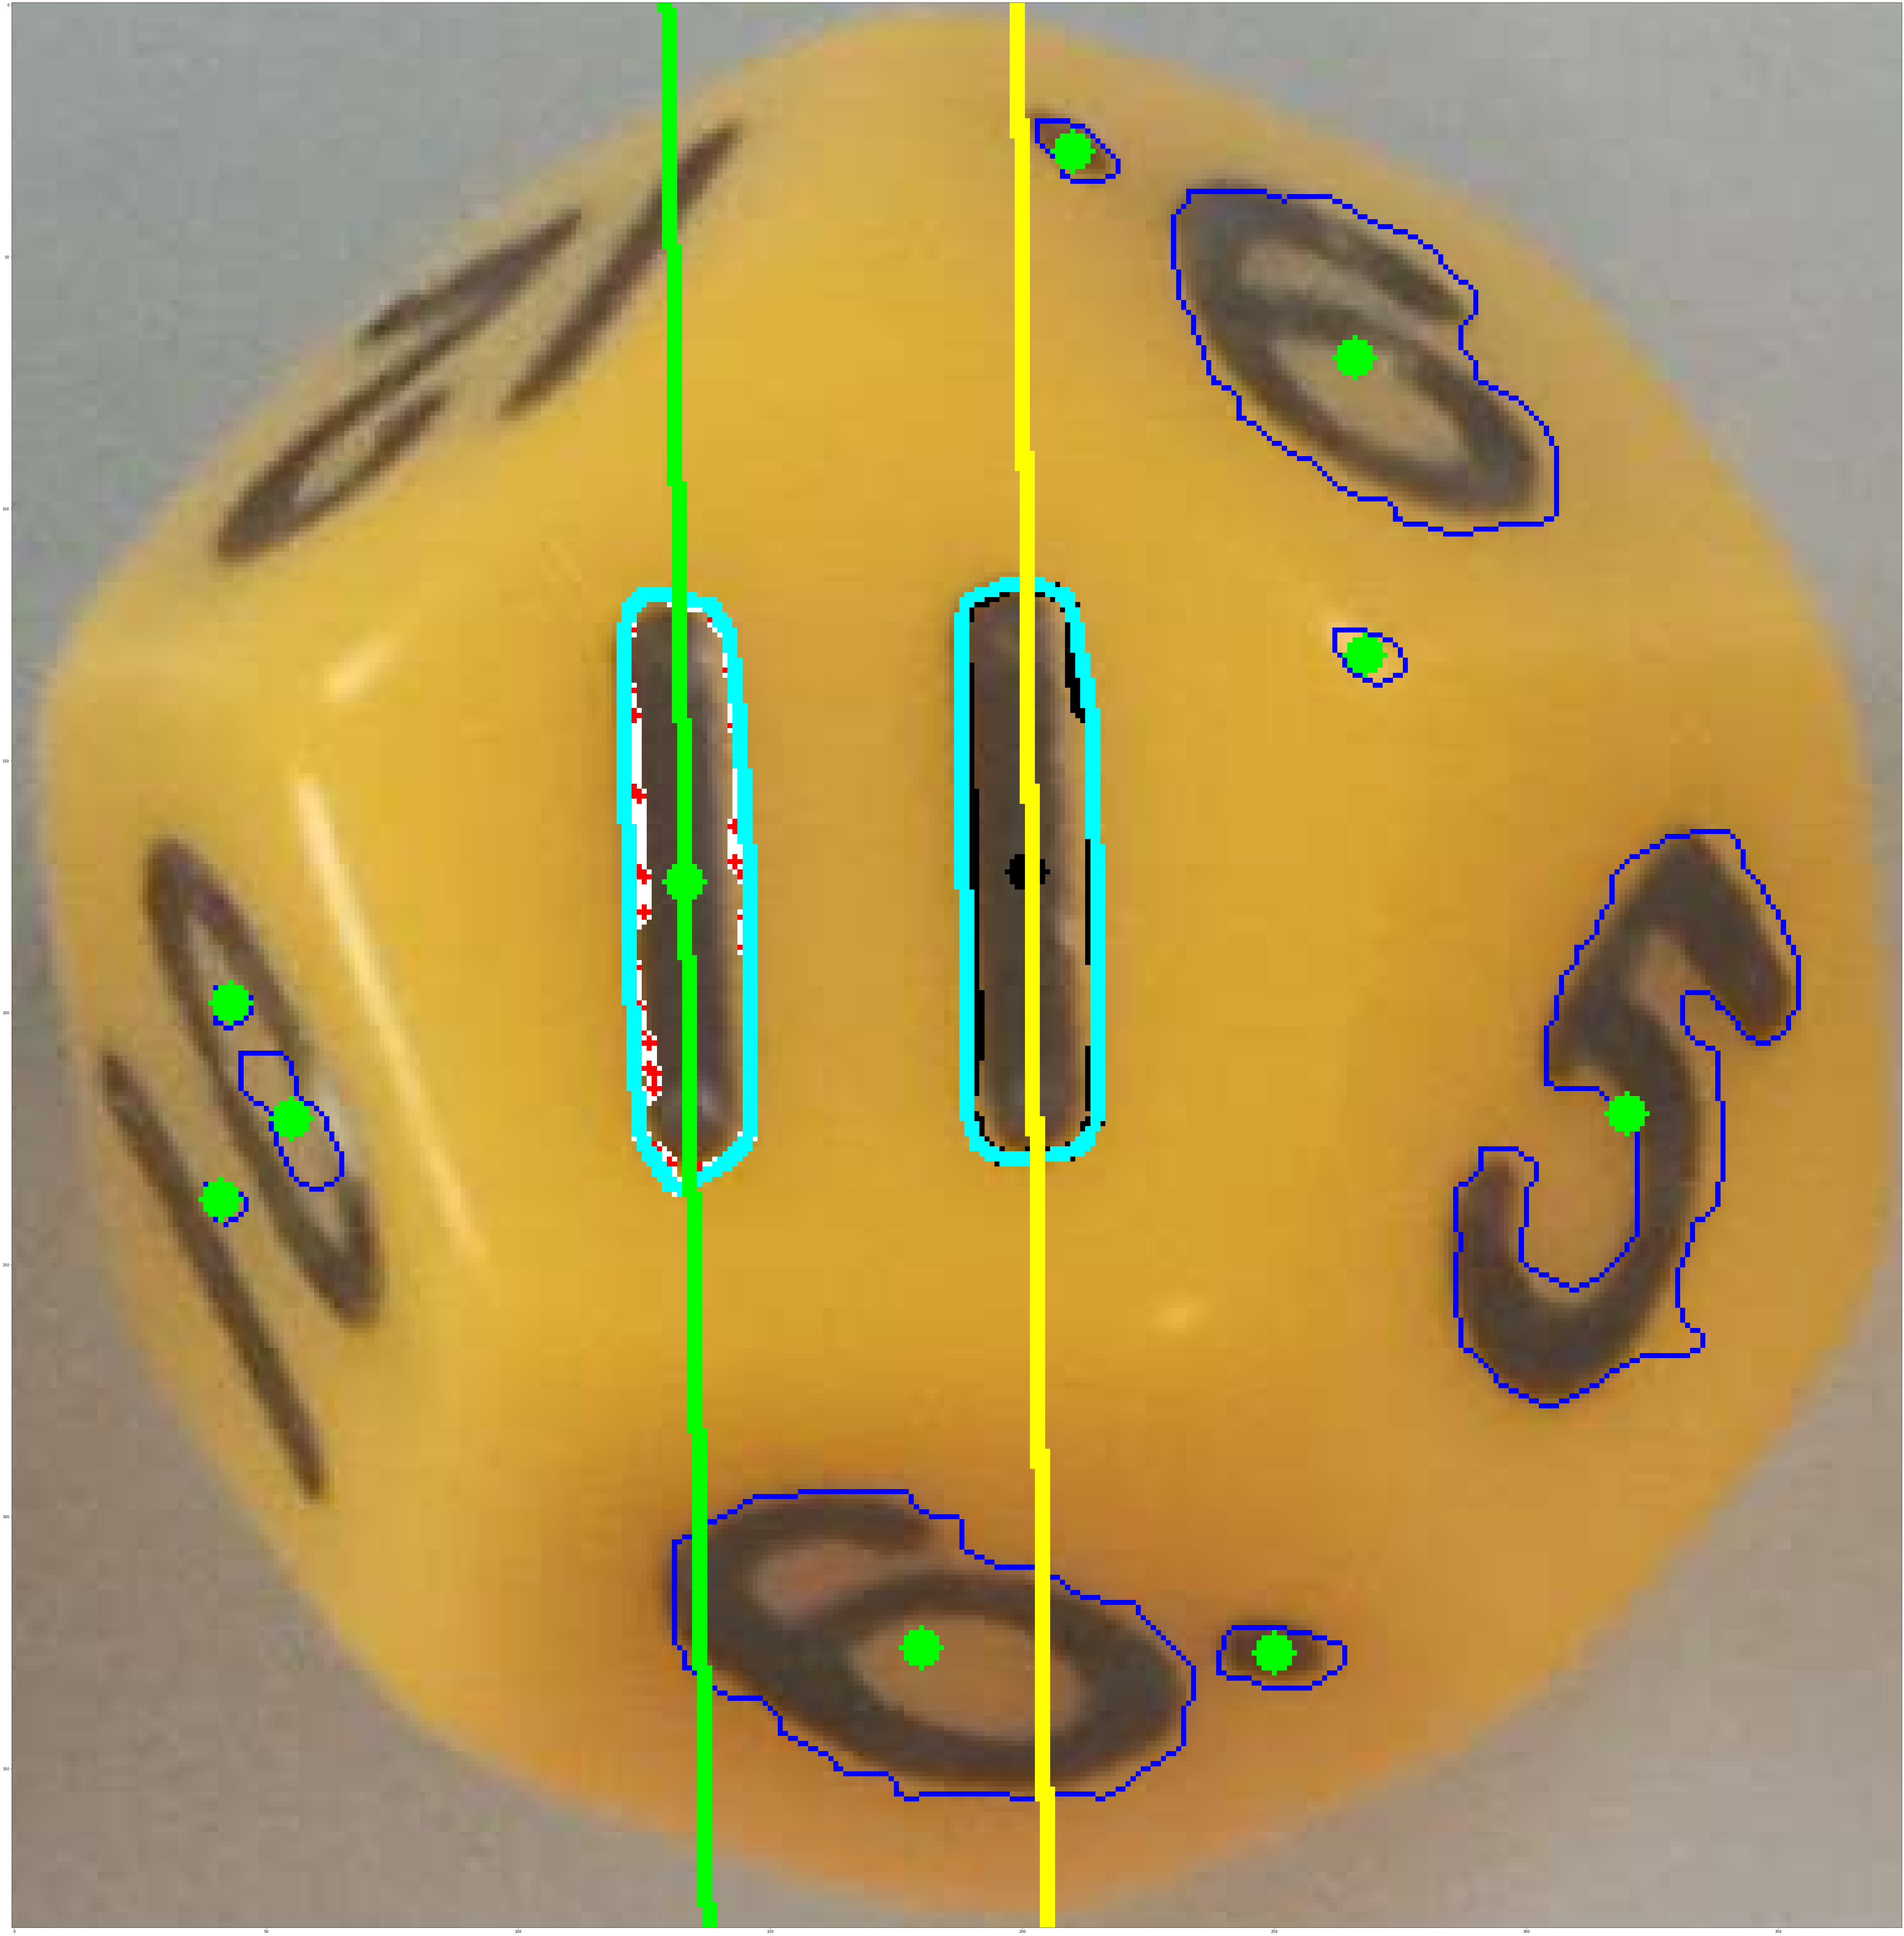

In [489]:
hullOfClosestCenter = cv2.convexHull(closestContur)
hullOfSecondClosest = cv2.convexHull(contoursWithoutDice[secondClosestCordIndex])

if debug == 1:
    cv2.drawContours(dieRawTemp,contoursWithoutDice[secondClosestCordIndex],-1,(255,0,0),2)
    cv2.drawContours(dieRawTemp,[hullOfClosestCenter],-1,(0,255,255),2)
    cv2.drawContours(dieRawTemp,[hullOfSecondClosest],-1,(0,255,255),2)

rows,cols = dieRawTemp.shape[:2]
        
[vx1,vy1,x1,y1] = cv2.fitLine(hullOfClosestCenter, cv2.DIST_L2,0,0.01,0.01)

if debug == 1:
    lefty = int((-x1*vy1/vx1) + y1)
    righty = int(((cols-x1)*vy1/vx1)+y1)
    cv2.line(dieRawTemp,(cols-1,righty),(0,lefty),(255,255,0),2)
    print("vx1:",vx1,"vy1:",vy1,"x:",x1,"y:",y1)

[vx2,vy2,x2,y2] = cv2.fitLine(hullOfSecondClosest, cv2.DIST_L2,0,0.01,0.01)

if debug == 1:
    lefty = int((-x2*vy2/vx2) + y2)
    righty = int(((cols-x2)*vy2/vx2)+y2)
    cv2.line(dieRawTemp,(cols-1,righty),(0,lefty),(0,255,0),2)
    print("vx2:",vx2,"vy2:",vy2,"x:",x2,"y:",y2)
    
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

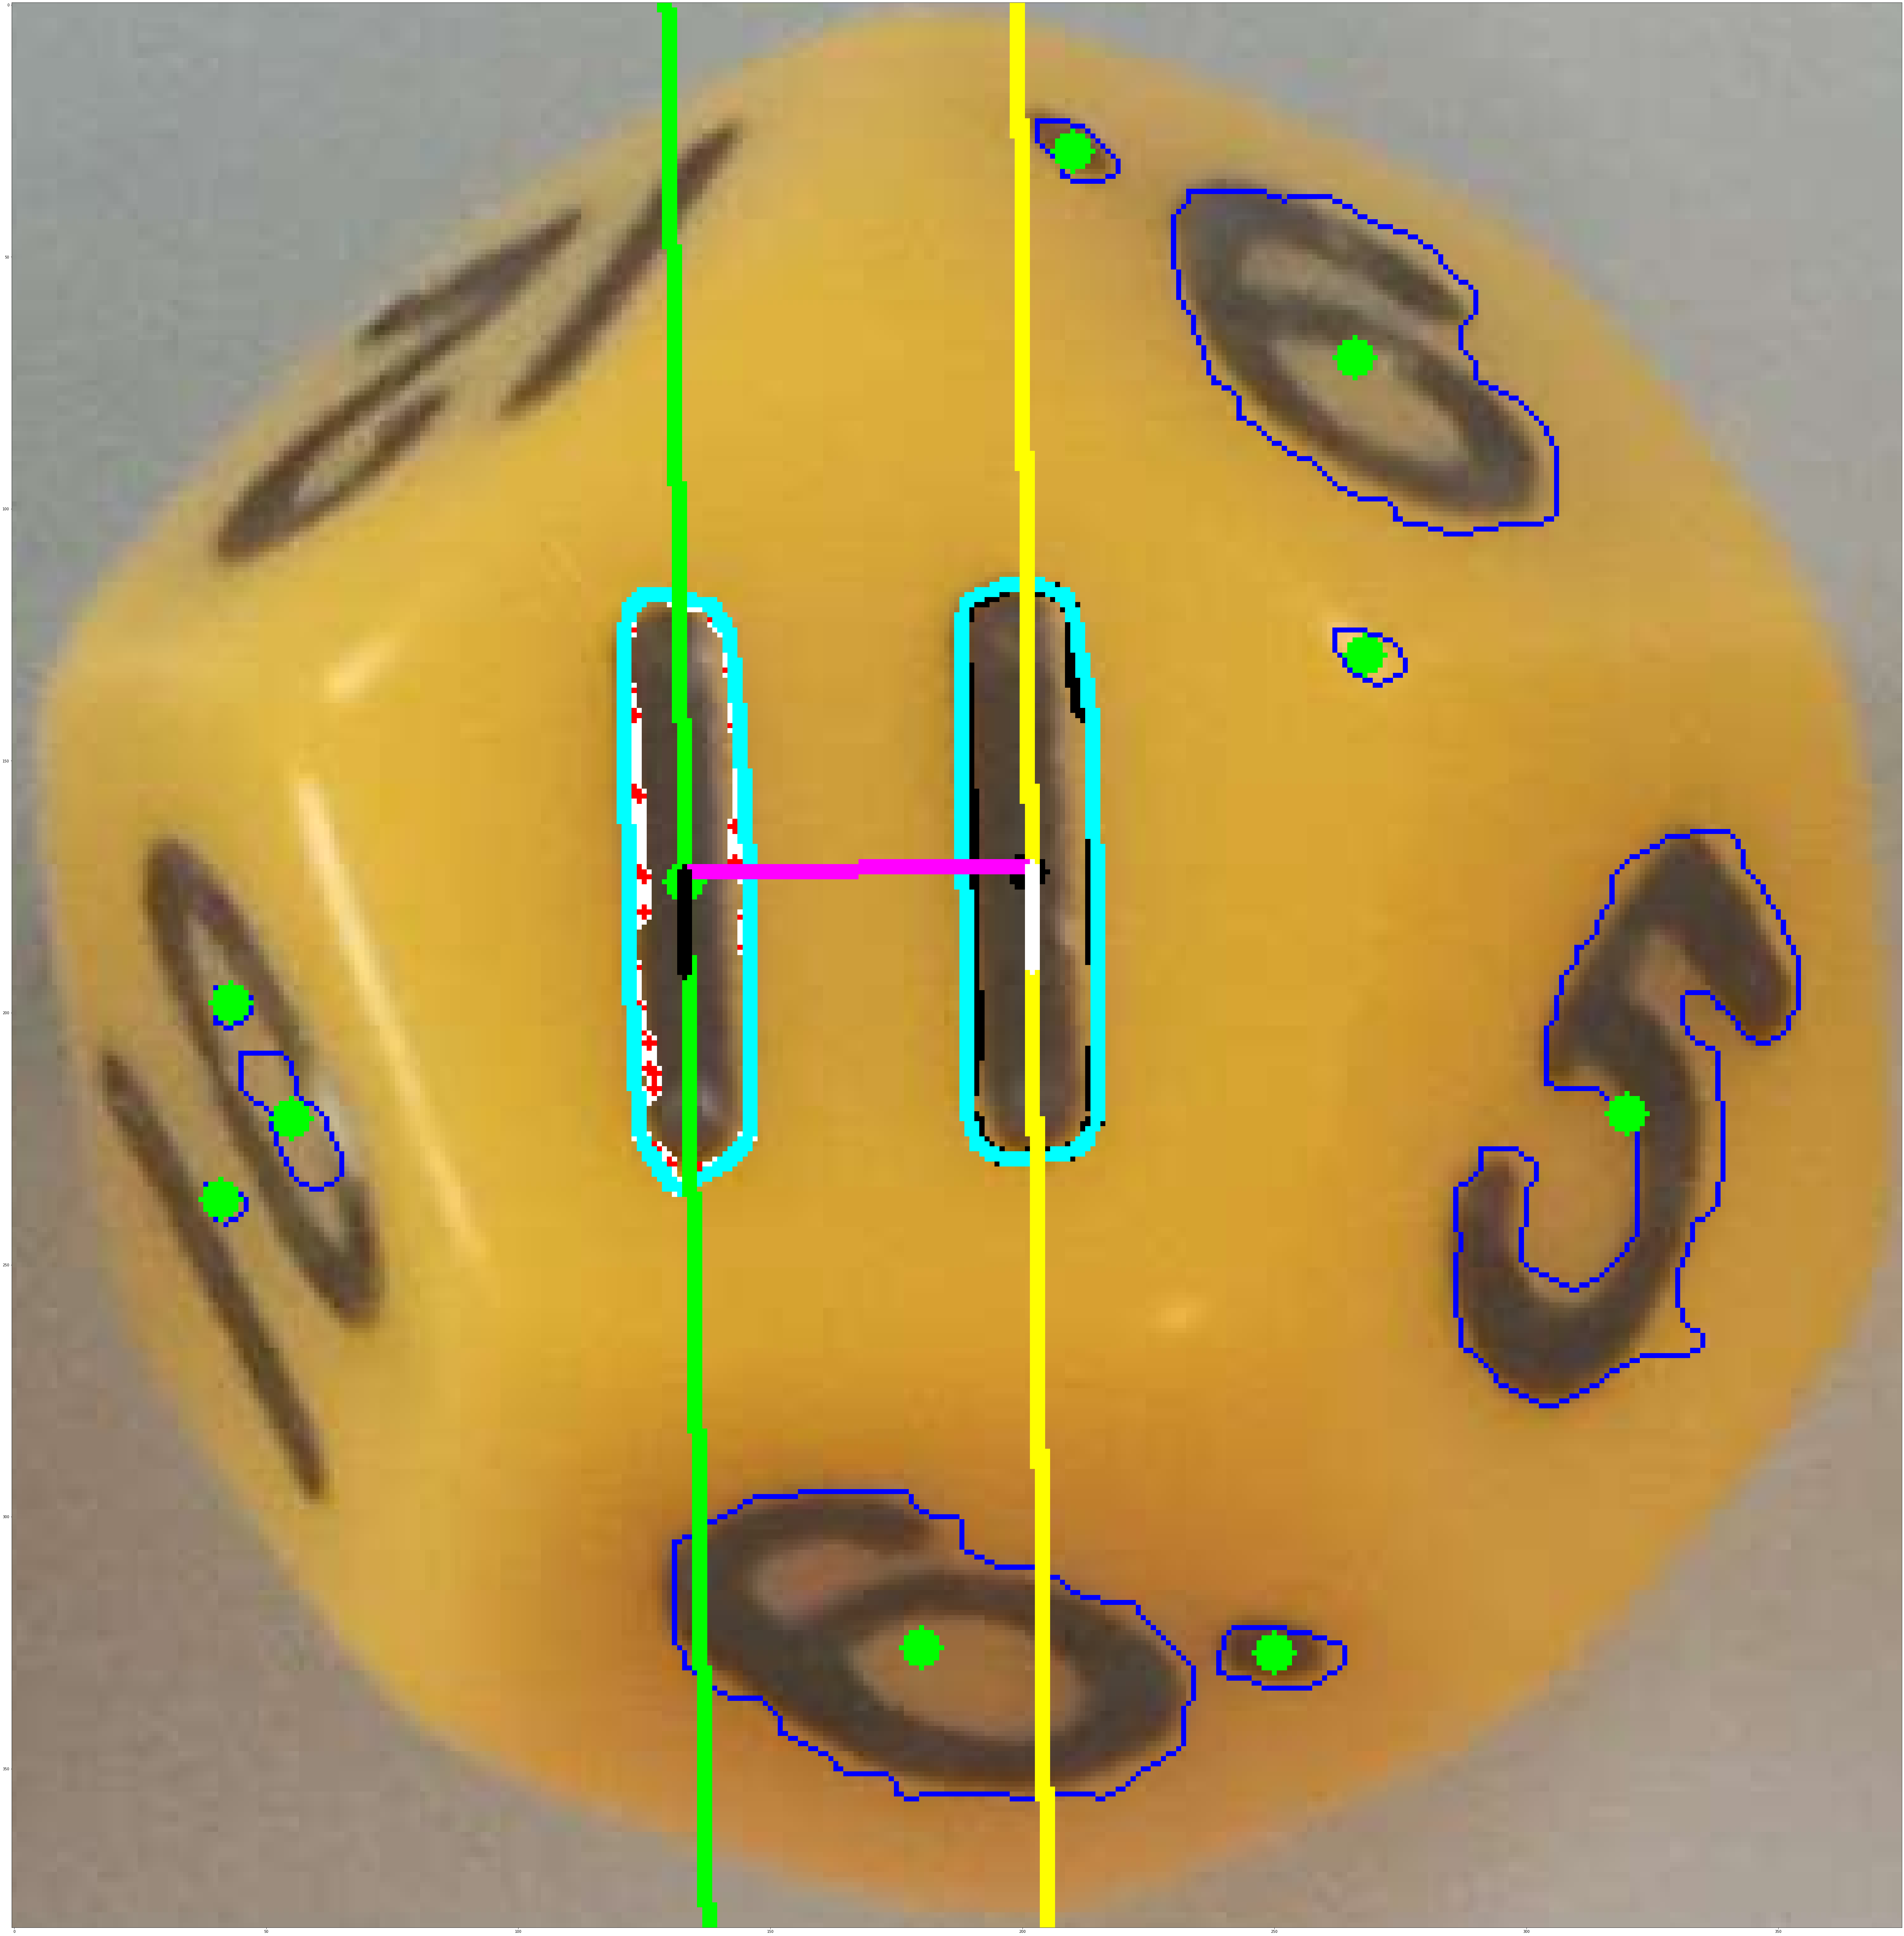

In [490]:
if debug == 1:
    cv2.line(dieRawTemp,(int(x2),int(y2)),(int(x1),int(y1)),(255,0,255),2)
    cv2.line(dieRawTemp,(int(x2),int(y2)),(int(x2+vx2*20),int(y2+vy2*20)),(0,0,0),2)
    cv2.line(dieRawTemp,(int(x1),int(y1)),(int(x1+vx1*20),int(y1+vy1*20)),(255,255,255),2)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

In [491]:
from math import sqrt
from math import acos

def pythagoras(x,y):
    x2 = x**2
    y2 = y**2
    return sqrt(x2+y2)

def dotProduct(x1,y1,x2,y2):
    return (x1*x2)+(y1*y2)

def angleBettween(vector1x,vector1y,vector2x,vector2y):
    print(vector1x,vector1y,vector2x,vector2y)
    
    vec1Len = pythagoras(vector1x,vector1y)
    vec2Len = pythagoras(vector2x,vector2y)
    
    dotProd = dotProduct(vector1x,vector1y,vector2x,vector2y)
    print("acos(",dotProd[0],"/",vec1Len,"*",vec2Len,")")
    
    return acos((dotProd[0]/((vec1Len*vec2Len)+1e-5)))

# acos(dot product(U,V)/Mangitued V * Mangintued U)

In [492]:
angle = angleBettween(vx1,vy1,vx2,vy2)
vx3 = x1 - x2
vy3 = y1 - y2
print("vx3",vx3,"vy3",vy3)
shouldBe90 = angleBettween(vx1,vy1,vx3,vy3)
if debug == 1:
    print(angle,shouldBe90*57.29578)

[0.01516447] [0.999885] [0.02134848] [0.9997721]
acos( 0.9999808 / 1.0 * 0.9999999701976772 )
vx3 [68.8] vy3 [-0.75]
[0.01516447] [0.999885] [68.8] [-0.75]
acos( 0.29340154 / 1.0 * 68.80409093714923 )
0.007637112580294542 89.75567345341449


In [493]:
def crop_minAreaRect(img, rect):

    # rotate img
    angle = rect[2]
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))

    # rotate bounding box
    rect0 = (rect[0], rect[1], 0.0) 
    box = cv2.boxPoints(rect0)
    pts = np.int0(cv2.transform(np.array([box]), M))[0]    
    pts[pts < 0] = 0

    # crop
    img_crop = img_rot[pts[1][1]:pts[0][1], 
                       pts[1][0]:pts[2][0]]

    return img_crop

def imgRotate(img,angle):
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))
    
#from: https://stackoverflow.com/a/48553593
def getSubImage(rect, src):
    # Get center, size, and angle from rect
    center, size, angle = rect
    # Convert to int 
    center, size = tuple(map(int, center)), tuple(map(int, size))
    if debug == 1:
        print(center)
        print(size)
    size = (size[0]+14,size[1]+14)
    # Get rotation matrix for rectangle
    M = cv2.getRotationMatrix2D( center, angle, 1)
    # Perform rotation on src image
    dst = cv2.warpAffine(src, M, src.shape[:2])
    out = cv2.getRectSubPix(dst, size, center)
    return out

In [494]:
def imgRotate(img,angle):
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))
    if debug == 1:
        plt.figure(figsize=(100,100))
        plt.subplot(1,2,1),plt.imshow(img_rot)
    return img_rot

[0.01938968] [0.999812] 0 1
acos( 0.999812 / 1.0 * 1.0 )
1.14016472581352


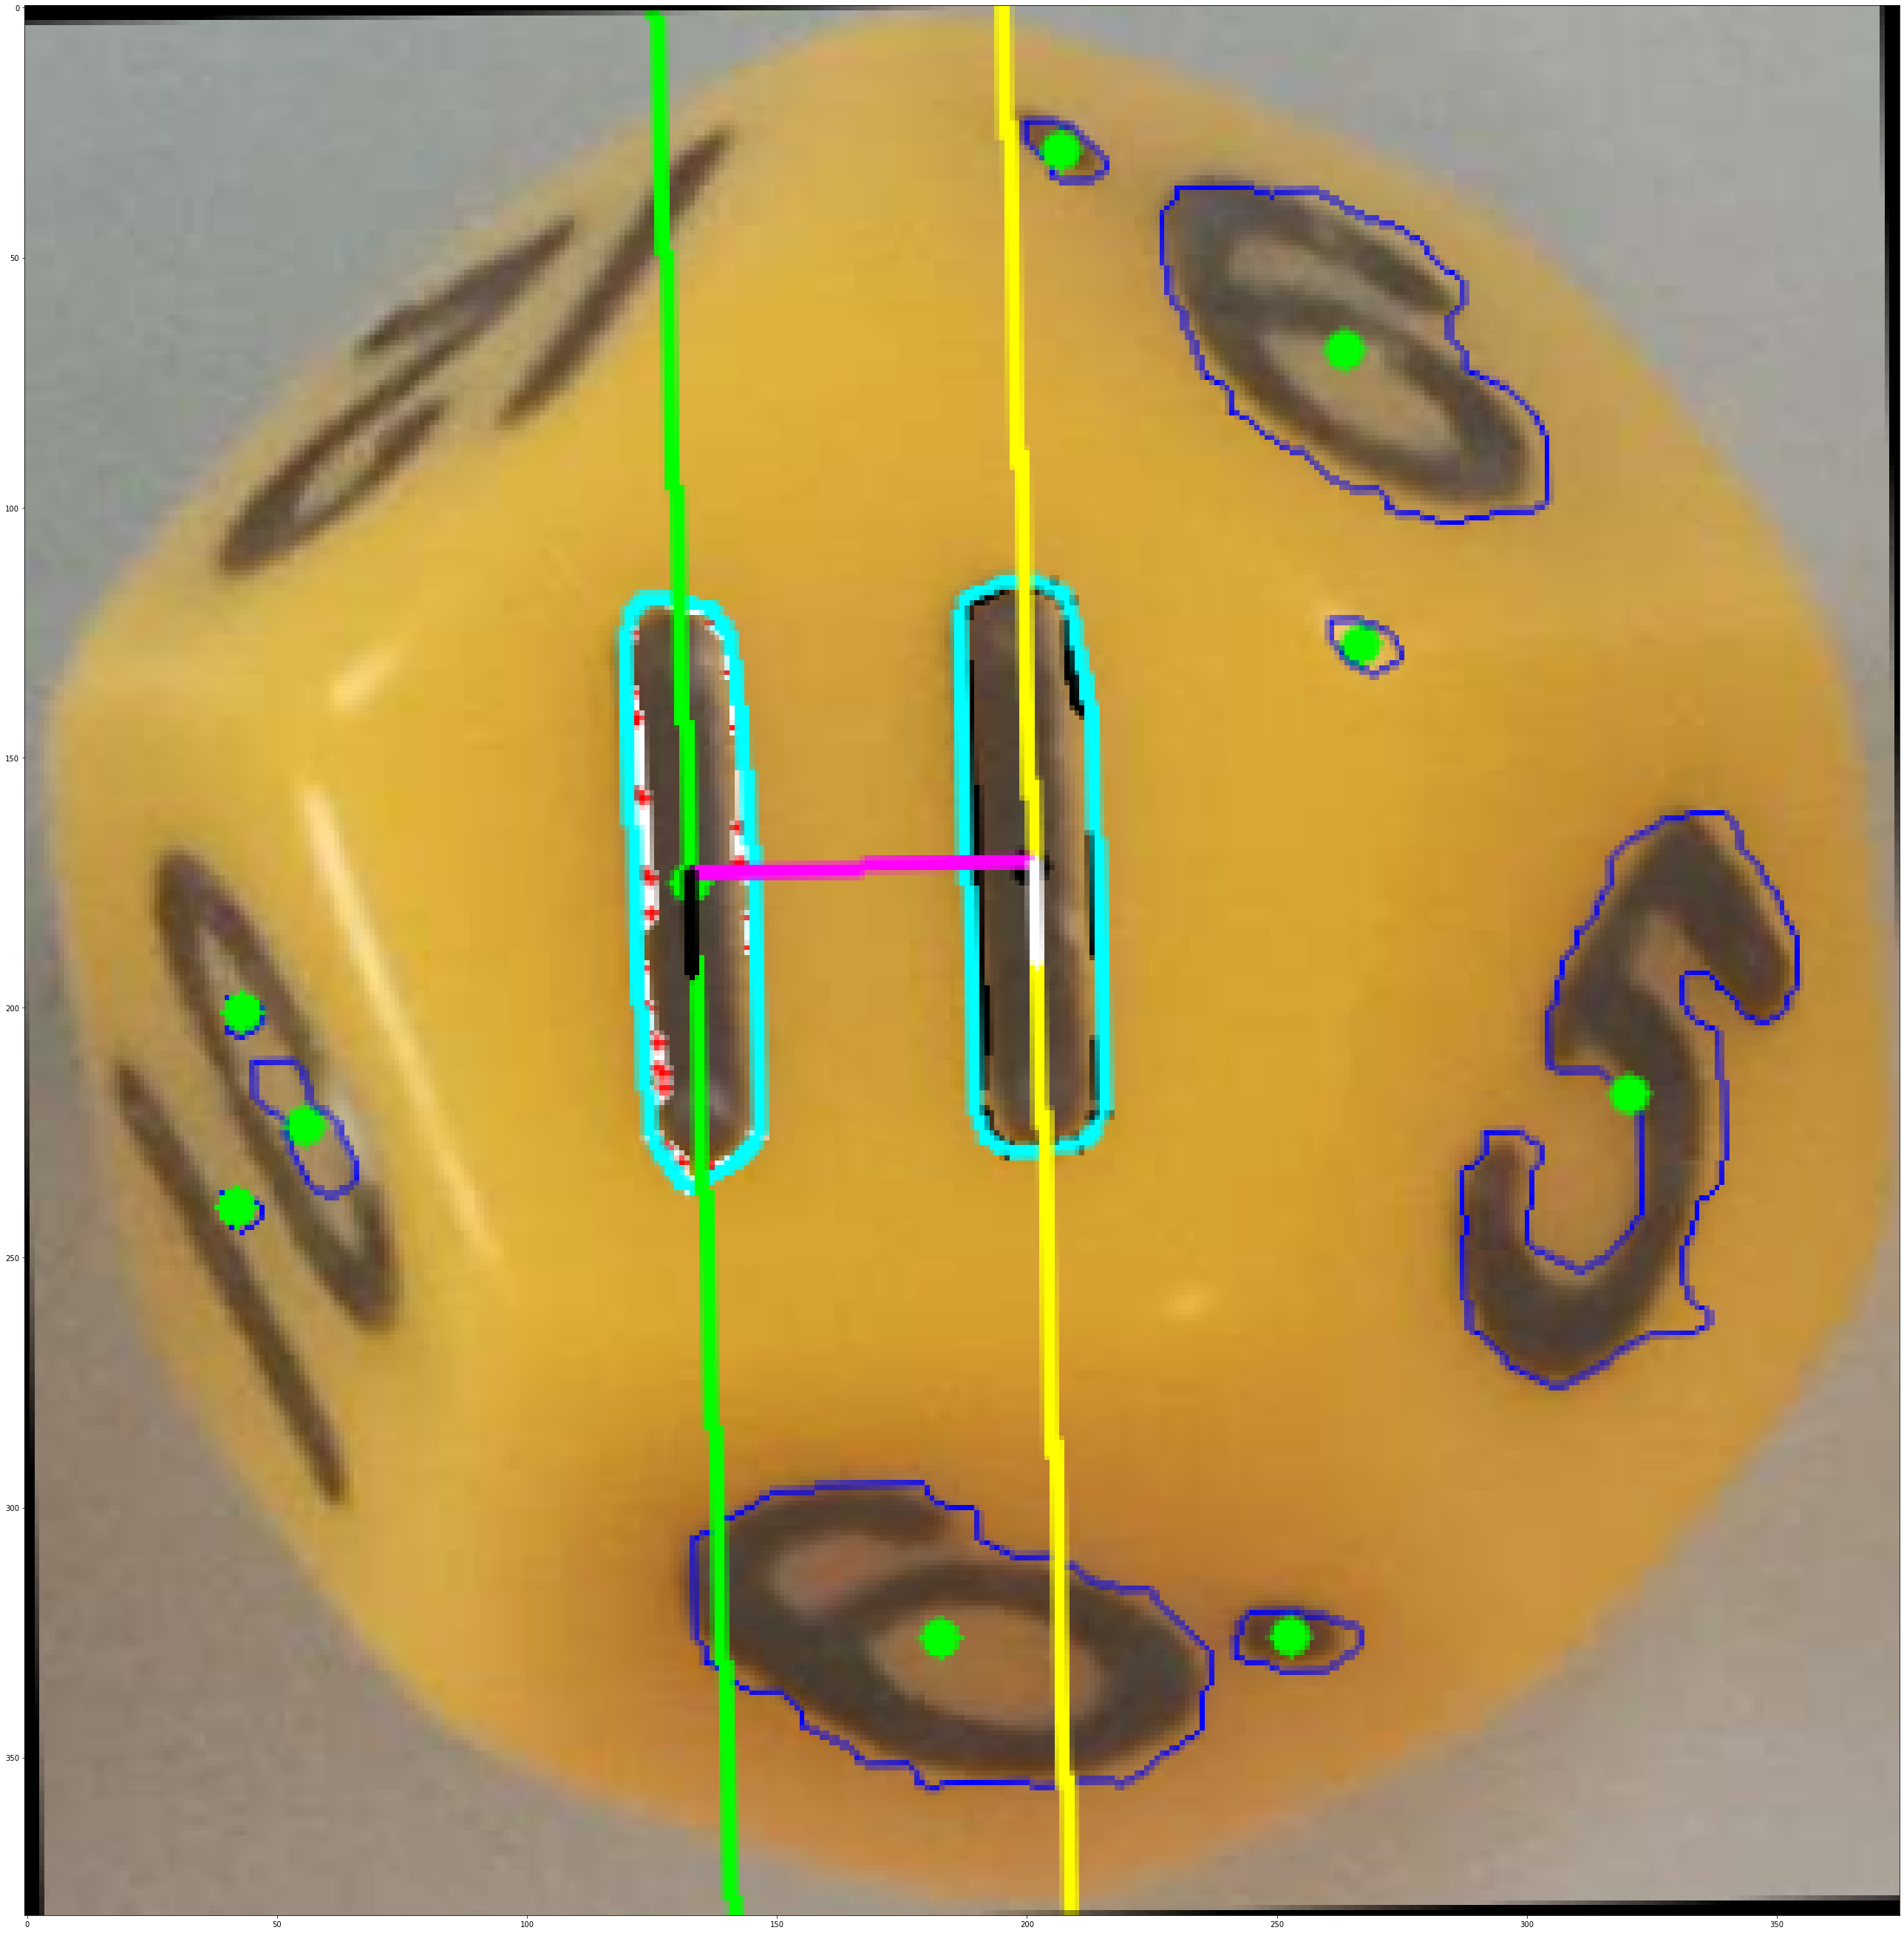

In [500]:
[vx1,vy1,x1,y1] = cv2.fitLine(bestContur, cv2.DIST_L2,0,0.01,0.01)
angleToRoateBy = angleBettween(vx1,vy1,0,1)
angleToRoateBy = angleToRoateBy%math.pi
print(angleToRoateBy*57.29578)
imgRotate(dieRawTemp,(angleToRoateBy*57.29578))

((201.62887573242188, 171.970458984375), (114.03775024414062, 26.335412979125977), 89.35625457763672)
((133.88912963867188, 175.90200805664062), (118.10774230957031, 24.286893844604492), 88.9583740234375)
0.39788055419921875
(201, 171)
(114, 26)
(133, 175)
(118, 24)
(133, 175)
(118, 24)


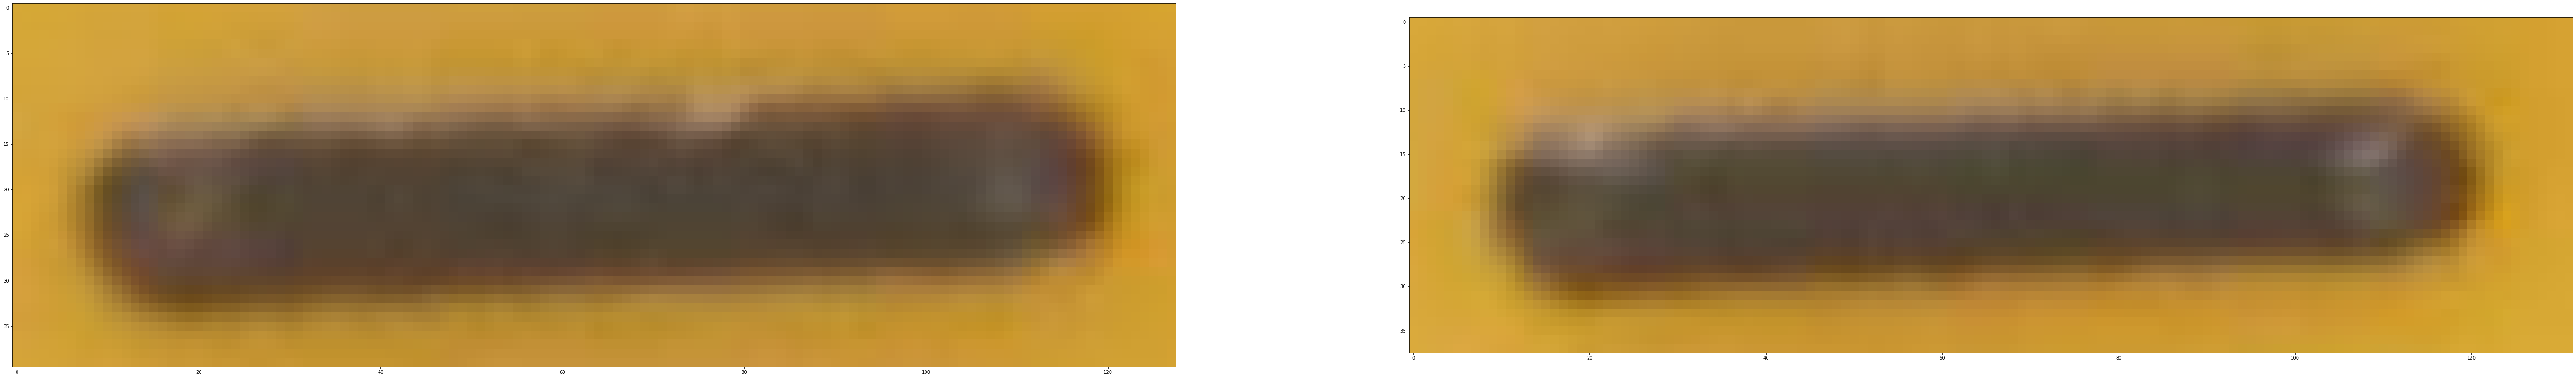

In [496]:
MinRectClosetContur = cv2.minAreaRect(closestContur)
MinRectSecondClosestContur =  cv2.minAreaRect(contoursWithoutDice[secondClosestCordIndex])
if debug == 1:
    print(MinRectClosetContur)
    print(MinRectSecondClosestContur)
angleDifreance = MinRectClosetContur[2]-MinRectSecondClosestContur[2]
if debug == 1:
    print(angleDifreance)
output = []
output.append(getSubImage(MinRectClosetContur,dieRaw))
if angleDifreance < 5 and angleDifreance > -5:
    output.append(getSubImage(MinRectSecondClosestContur,dieRaw))
output.append(getSubImage(MinRectSecondClosestContur,dieRaw))

if debug == 1:
    plt.figure(figsize=(100,100))
    plt.subplot(1,2,1),plt.imshow(output[0])
    plt.subplot(1,2,2),plt.imshow(output[1])

In [497]:
print(MinRectClosetContur[2])
print(MinRectSecondClosestContur[2])

89.35625457763672
88.9583740234375


In [523]:
[[[1,2],[3,4]]][0][0]

[1, 2]

In [519]:
print(output[1])

[[[216 168  58]
  [216 168  58]
  [215 167  57]
  ...
  [213 161  49]
  [214 162  50]
  [214 162  50]]

 [[216 168  58]
  [215 167  57]
  [215 167  57]
  ...
  [213 161  49]
  [214 162  50]
  [214 162  50]]

 [[215 167  57]
  [215 167  57]
  [214 166  56]
  ...
  [213 161  49]
  [214 162  50]
  [214 162  50]]

 ...

 [[218 170  60]
  [217 169  60]
  [216 168  61]
  ...
  [216 169  53]
  [216 169  53]
  [216 169  53]]

 [[218 170  60]
  [217 169  61]
  [217 168  62]
  ...
  [217 170  54]
  [217 170  54]
  [217 170  54]]

 [[218 170  60]
  [217 170  61]
  [217 169  63]
  ...
  [217 170  54]
  [217 170  54]
  [217 170  54]]]
